# Анализ оттока клиентов банка

**Цель проектной работы** – изучить причины оттока клиентов банка «Метанпромбанк», выделить сегменты, склонные чаще остальных уходить из банка, а также сформировать рекомендации, которые помогут вернуть и/или удержать клиентов банка.

**Заказчики проектной работы** – менеджеры отдела маркетинга банка. 

**Конечный результат проектной работы** – подготовка [презентации](https://drive.google.com/file/d/1rFGe5AyhZ2s_5xEOnoS_SLgbpw2AXNrJ/view?usp=sharing) с описанием сегментов оттока и рекомендациями по их возврату и/или удержанию. Также необходимо разработать [дашборд](https://public.tableau.com/app/profile/mher.dallakyan/viz/customer_outflow_diplom/customer_outflow_diplom?publish=yes) для анализа оттока клиентов в зависимости от количества используемых ими продуктов и с возможностью фильтрации по их местоположению.

Полученный датасет `bank_scrooge.csv` содержит информацию о клиентах в Ярославле, Рыбинске и Ростове и имеет следующие столбцы с данными:
- `USERID` – идентификатор пользователя,
- `score` – баллы кредитного скоринга,
- `city` – город,
- `gender` – пол,
- `age` – возраст,
- `equity` – количество баллов собственности,
- `balance` – баланс на счёте,
- `products` – количество банковских продуктов, которыми пользуется клиент,
- `credit_card` – есть ли кредитная карта (1 – имеется, 0 – отсутствует),
- `last_activity` – активность клиента (1 – активный, 0 – неактивный),
- `EST_SALARY` – заработная плата клиента (оценка),
- `churn` – ушёл (1) или нет (0).

Отметим, что значения в приведенных столбцах не относятся к какому-то определенному периоду и нам неизвестно, каким образом данные аккумулируются и обновляются.

В рамках этого исследования будут проведены следующие работы:
- предобработка данных и их изучение,
- исследовательский (в т. ч. корреляционный) анализ данных,
- проверка статистических гипотез,
- сегментация клиентов,
- формирование рекомендаций для возврата/удержания клиентов.

Перед выполнением исследования – импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
from scipy import stats as st
import numpy as np
import plotly.express as px
from statistics import variance # используется для расчета дисперсии
import statistics # применяется для расчета моды

<a id="contents"></a> 
<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-изучение-общей-информации" data-toc-modified-id="Загрузка-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Наименования-столбцов" data-toc-modified-id="Наименования-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Наименования столбцов</a></span></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Анализ-пропусков" data-toc-modified-id="Анализ-пропусков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ пропусков</a></span></li><li><span><a href="#Явные-дубликаты" data-toc-modified-id="Явные-дубликаты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Явные дубликаты</a></span></li><li><span><a href="#Неявные-дубликаты" data-toc-modified-id="Неявные-дубликаты-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Неявные дубликаты</a></span></li><li><span><a href="#Краткие-выводы" data-toc-modified-id="Краткие-выводы-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Краткие выводы</a></span></li></ul></li><li><span><a href="#Добавление-столбцов-в-датасет" data-toc-modified-id="Добавление-столбцов-в-датасет-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление столбцов в датасет</a></span><ul class="toc-item"><li><span><a href="#Столбцы-по-названию-городов" data-toc-modified-id="Столбцы-по-названию-городов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Столбцы по названию городов</a></span></li><li><span><a href="#Столбец-age_group" data-toc-modified-id="Столбец-age_group-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Столбец <code>age_group</code></a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общая-характеристика-клиентской-базы" data-toc-modified-id="Общая-характеристика-клиентской-базы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общая характеристика клиентской базы</a></span></li><li><span><a href="#Портрет-клиента-банка-(в-разрезе-пола)" data-toc-modified-id="Портрет-клиента-банка-(в-разрезе-пола)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Портрет клиента банка (в разрезе пола)</a></span></li><li><span><a href="#Портрет-клиента-банка-(в-разрезе-оттока)" data-toc-modified-id="Портрет-клиента-банка-(в-разрезе-оттока)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Портрет клиента банка (в разрезе оттока)</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Изучение-характеристик-клиентов-в-разрезе-оттока" data-toc-modified-id="Изучение-характеристик-клиентов-в-разрезе-оттока-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучение характеристик клиентов в разрезе оттока</a></span></li><li><span><a href="#Краткие-выводы" data-toc-modified-id="Краткие-выводы-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Краткие выводы</a></span></li></ul></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-равенстве-доходов" data-toc-modified-id="Гипотеза-о-равенстве-доходов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза о равенстве доходов</a></span></li><li><span><a href="#Гипотеза-о-равенстве-возраста" data-toc-modified-id="Гипотеза-о-равенстве-возраста-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Гипотеза о равенстве возраста</a></span></li><li><span><a href="#Гипотеза-о-равенстве-количества-банковских-продуктов" data-toc-modified-id="Гипотеза-о-равенстве-количества-банковских-продуктов-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Гипотеза о равенстве количества банковских продуктов</a></span></li><li><span><a href="#Гипотеза-о-равенстве-баллов-собственности" data-toc-modified-id="Гипотеза-о-равенстве-баллов-собственности-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Гипотеза о равенстве баллов собственности</a></span></li><li><span><a href="#Краткие-выводы" data-toc-modified-id="Краткие-выводы-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Краткие выводы</a></span></li></ul></li><li><span><a href="#Сегментация-клиентов-банка" data-toc-modified-id="Сегментация-клиентов-банка-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Сегментация клиентов банка</a></span><ul class="toc-item"><li><span><a href="#Общая-информация-об-оттоке-клиентов" data-toc-modified-id="Общая-информация-об-оттоке-клиентов-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Общая информация об оттоке клиентов</a></span></li><li><span><a href="#Выделение-сегментов" data-toc-modified-id="Выделение-сегментов-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Выделение сегментов</a></span><ul class="toc-item"><li><span><a href="#Cегмент-№-1" data-toc-modified-id="Cегмент-№-1-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Cегмент № 1</a></span></li><li><span><a href="#Сегмент-№-2" data-toc-modified-id="Сегмент-№-2-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Сегмент № 2</a></span></li><li><span><a href="#Сегмент-№-3" data-toc-modified-id="Сегмент-№-3-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Сегмент № 3</a></span></li></ul></li><li><span><a href="#Краткие-выводы" data-toc-modified-id="Краткие-выводы-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Краткие выводы</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации-для-заказчика" data-toc-modified-id="Выводы-и-рекомендации-для-заказчика-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы и рекомендации для заказчика</a></span><ul class="toc-item"><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Рекомендации-по-сегментам" data-toc-modified-id="Рекомендации-по-сегментам-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Рекомендации по сегментам</a></span></li></ul></li></ul></div>

## Загрузка данных и изучение общей информации

Сохраним полученный датасет в переменную `data` и посмотрим на первые пять строк.

In [2]:
# загрузка данных и их сохранение в переменной
data = pd.read_csv("bank_scrooge.csv")
data.head()

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

Выведем краткое описание датасета.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Исходя из представленной информации, предварительно можем заключить следующее:

- датасет содержит 12 столбцов и 10 тыс. записей,
- наименования столбцов содержат символы как нижнего, так и верхнего регистров,
- в двух столбцах имеются пропуски,
- в отдельных столбцах типы данных не соответствуют значениям в них.

Отметим, что столбец `credit_card` содержит информацию не о количестве кредитных карт, а о наличии у клиента хотя бы одной такой карты. Из этого следует, что если, к примеру, значение в столбце `credit_card` отлично от нуля и одновременно с этим клиент имеет два продукта (столбец `product`), то не исключено, что оба этих продукта могут быть кредитными картами.

Данные об остатках на счетах клиентов (столбец `balance`) нельзя считать достаточно релевантными, поскольку в момент их выгрузки остаток клиента мог быть нулевым, но его среднее значение, к примеру, за календарный год может отличаться от нуля. 

## Предобработка данных

**Для возврата к оглавлению нажмите [сюда](#contents).**

### Наименования столбцов

Приведем все названия столбцов к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Скорректируем название столбца `userid`, разделив слитное написание слов нижним подчеркиванием.

In [5]:
data = data.rename(columns={'userid': 'user_id'})
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Типы данных

Выведем типы данных для всех столбцов датасета.

In [6]:
data.dtypes

user_id            int64
score            float64
city              object
gender            object
age              float64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
est_salary       float64
churn              int64
dtype: object

Начнем со столбца `score`. Если значения в этом столбце не содержат десятичных знаков, отличных от нуля, то сменим тип данных с *float* на *int*. 

Напишем функцию `float_or_not(column)`, которая поможет проверить все значения в столбце.

In [7]:
def float_or_not(column):
      
    if column.isna().sum() == 0: # подсчет возможных несоответствий начинается только при отсутствии пропусков в столбце
        
        counter = 0 # изначальное значение счетчика, подсчитывающий количество несоответствий между значениями двух типов
        index = 0 # изначальное значение индекса для движения по столбцу
        
        while index < len(column):
            if column[index] == column[index].astype(int):
                counter += 0 # если между значениями двух типов данных нет разницы, то счетчик остается прежним           
            else:
                counter += 1 # иначе прибавляется единица            
            index += 1 
            
        if counter == 0: 
            return print('There is not float in column.')
        else:
            return print('There is float in column.')
        
    else: # функция заканчивает свою работу при наличии пропусков в столбце    
        return print('There is NaN in column and data type can not be changed.') 

In [8]:
# вызовем функцию
float_or_not(data['score'])

There is not float in column.


Таким образом, тип данных для значений в столбце `score` можем сменить.

In [9]:
# сменим тип данных, а затем проверим корректность смены
data['score'] = data['score'].astype('int64')
data['score'].dtype

dtype('int64')

Столбец `age` содержит информацию о *полном возрасте* клиентов банка, но в связи с наличием пропусков в нем (0.26%) – нам не удастся сменить тип данных с *float* на *int*.

In [10]:
# посмотрим на уникальные значения в столбце "age"
print(sorted(data['age'].unique()))

[18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, nan, 81.0, 82.0, 83.0, 84.0, 86.0]


Значения в столбцах `credit_card`, `last_activity` и `churn` соответствуют типу *bool*, но поскольку при смене типа данных численные значения будут заменены на *True* и *False*, то оставим их без изменений.

Типы данных в остальных столбцах, не упомянутые отдельно в этом разделе, соответствуют изначально заданным.

### Анализ пропусков

Посчитаем, сколько пропусков имеется в каждом столбце датасета.

In [11]:
# считаем долю пропусков в каждом столбце
round(data.isna().sum() / len(data) * 100, 2)

user_id           0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

Доля пропусков с информацией о возрасте клиентов несущественна (около 0.3%). В абсолютном выражении пропуски равномерно распределены между Ярославлем и Рыбинском. 

In [12]:
# считаем количество пропусков в столбце "age" в разбивке по городам
(data[data['age'].isna()].groupby('city')
                 .agg({'user_id': 'count'})
                 .rename(columns={'user_id': 'quantity'}))

quantity
city               
Ростов            1
Рыбинск          12
Ярославль        13

Существенная доля пропусков в датасете лишь в столбце `balance`, содержащем информацию об остатке денежных средств на счете клиента, – 23%. Пропуски практически равномерно распределены между клиентами в Ярославле и Рыбинске, в Ростове – их меньше всего.

In [13]:
# посчитаем распределение пропусков по городам 
nan_in_balance_by_city = (data[data['balance'].isna()].groupby('city')
                                              .agg({'user_id': 'count'})
                                              .rename(columns={'user_id': 'user_counts'}))

# посчитаем общее количество клиентов по городам
total_users_by_city = (data.groupby('city').agg({'user_id': 'count'})
                                           .rename(columns={'user_id': 'total_users'}))

# рассчитаем долю пропусков в разбивке по городам
nan_in_balance_by_city['nan_percent_by_city'] = round(nan_in_balance_by_city['user_counts'] / 
                                                      total_users_by_city['total_users'] * 100,
                                                      2)

# выведем таблицу на экран
nan_in_balance_by_city

user_counts  nan_percent_by_city
city                                       
Ростов             235                16.58
Рыбинск            593                22.00
Ярославль         1467                24.92

Посмотрим, как пропуски в столбце `balance` распределены в зависимости от гендерного признака (столбец `gender`).

In [14]:
# посчитаем распределение пропусков по гендерному признаку 
nan_in_balance_by_gender = (data[data['balance'].isna()].groupby('gender')
                                                .agg({'user_id': 'count'})
                                                .rename(columns={'user_id': 'user_counts'}))

# посчитаем общее количество клиентов по гендерному признаку
total_users_by_gender = (data.groupby('gender').agg({'user_id': 'count'})
                                               .rename(columns={'user_id': 'total_users'}))

# рассчитаем долю пропусков в разбивке по гендерному признаку
nan_in_balance_by_gender['nan_percent_by_gender'] = round(nan_in_balance_by_gender['user_counts'] / 
                                                         total_users_by_gender['total_users'] * 100,
                                                         2)

# выведем таблицу на экран
nan_in_balance_by_gender

user_counts  nan_percent_by_gender
gender                                    
Ж              1013                  20.28
М              1282                  25.61

В зависимости от пола доля пропусков в столбце `balance` отличается примерно на 5.3 п.п. в пользу мужчин.

Рассчитаем доли пропусков в этом столбце для оставшихся и ушедших клиентов (столбец `churn`).

In [15]:
# посчитаем распределение пропусков для оставших и ушедших клиентов
nan_in_balance_by_churn = (data[data['balance'].isna()].groupby('churn')
                                               .agg({'user_id': 'count'})
                                               .rename(columns={'user_id': 'user_counts'}))

# посчитаем общее количество оставшихся и ушедших клиентов
total_users_by_churn = (data.groupby('churn').agg({'user_id': 'count'})
                                             .rename(columns={'user_id': 'total_users'}))

# рассчитаем долю пропусков для оставших и ушедших клиентов
nan_in_balance_by_churn['nan_percent_by_churn'] = (round(nan_in_balance_by_churn['user_counts'] / 
                                                         total_users_by_churn['total_users'] * 100,
                                                         2))

# выведем таблицу на экран
nan_in_balance_by_churn

user_counts  nan_percent_by_churn
churn                                   
0             2282                 27.90
1               13                  0.71

Большая часть пропусков приходится на оставшихся клиентов. То есть предположение о том, что пропуски в этом столбце означают нулевой остаток клиентов, принявших решение уйти из банка, скорей всего, неверна, что повышает вероятность технической ошибки в период накопления информации в банке или в момент ее выгрузки.

С другой стороны, предположение о том, что отсутствие собственности у клиентов означает снижение случаев взаимодействия с самим банком (в таких случаях как оплата налогов, штрафов, ЖКУ, получение арендной платы и пр.), может увеличивать вероятность того, что пропуски означают именно нулевые остатки на счетах.

In [16]:
# посчитаем распределение пропусков в зависимости от баллов собственности
nan_in_balance_by_equity = (data[data['balance'].isna()].groupby('equity')
                                                .agg({'user_id': 'count'})
                                                .rename(columns={'user_id': 'user_counts'}))

# посчитаем общее количество клиентов в зависимости от баллов собственности
total_users_by_equity = (data.groupby('equity').agg({'user_id': 'count'})
                                            .rename(columns={'user_id': 'total_users'}))

# рассчитаем долю пропусков в зависимости от баллов собственности
nan_in_balance_by_equity['nan_percent_by_equity'] = (round(nan_in_balance_by_equity['user_counts'] / 
                                                           total_users_by_equity['total_users'] * 100,
                                                           2))

# выведем таблицу на экран
nan_in_balance_by_equity

user_counts  nan_percent_by_equity
equity                                    
0              2180                  84.10
1               114                  14.73
3                 1                   0.06

В дополнение к последнему предположению важно отметить, что в клиентской базе имеются лишь два клиента с нулевым остатком, что является чрезвычайно низким показателем для банка и, скорей всего, не соответствует действительности.

In [17]:
data.query('balance == 0')

user_id  score       city gender   age  equity  balance  products  \
3900   179831    730  Ярославль      М  18.0       0      0.0         2   
6757   148456    813  Ярославль      М  20.0       2      0.0         2   

      credit_card  last_activity  est_salary  churn  
3900            1              1    64548.33      0  
6757            1              0    23876.51      0

Также посмотрим на пропуски в разбивке по количеству банковских продуктов.

In [18]:
# посчитаем распределение пропусков в зависимости от количества банковских продуктов
nan_in_balance_by_equity = (data[data['balance'].isna()].groupby('products')
                                                .agg({'user_id': 'count'})
                                                .rename(columns={'user_id': 'user_counts'}))

# посчитаем общее количество клиентов в зависимости от количества банковских продуктов
total_users_by_equity = (data.groupby('products')
                             .agg({'user_id': 'count'})
                             .rename(columns={'user_id': 'total_users'}))

# рассчитаем долю пропусков в зависимости от количества банковских продуктов
nan_in_balance_by_equity['nan_percent_by_equity'] = (round(nan_in_balance_by_equity['user_counts'] / 
                                                           total_users_by_equity['total_users'] * 100,
                                                           2))

# выведем таблицу на экран
nan_in_balance_by_equity

user_counts  nan_percent_by_equity
products                                    
0                   1                 100.00
1                1950                  58.37
2                 315                   6.15
3                  29                   2.79

Почти 60% пропусков в столбце `balance` принадлежит клиентам с одним банковским продуктом. Можно предположить, что существенная часть таких клиентов ранее пользовалось тем или иным продуктом банка (например, открывали текущий счет или счет вклада), но после удовлетворения своих потребностей (например, осуществления перевода или по истечении срока вклада) эти счета обнулялись и они переставали ими пользоваться. 

Посмотрим на наличие активности для клиентов с одним банковским продуктом, по которым отсутствует информация в столбце `balance`.

In [19]:
(data[(data['balance'].isna()) & (data['products'] == 1)].groupby(['last_activity'])
                                                         .agg({'user_id': 'count'})
                                                         .rename(columns={'user_id': 'user_counts'}))

user_counts
last_activity             
0                      867
1                     1083

Почти 45% клиентов с одним банковским продуктом не имели активности в последнее время, что может являться подтверждением нулевого остатка на счете. 

Исходя из проведенного анализа, мы не можем однозначно установить причины пропусков в столбце `balance`, а потому их следует отнести к неслучайным (missing not at random, MNAR) и оставить их такими, какими они есть. 

Добавим, что *информацию об остатках на счетах клиентов нельзя считать достаточно релевантной*, поскольку в момент выгрузки данных остаток на счете, например, мог быть нулевым, но его среднее значение, рассчитанное за календарный год с учетом остатка на начало каждого дня, может отличаться от нуля. 

### Явные дубликаты

В датасете отсутствую строки, которые полностью повторяют уже встречавшиеся. 

In [20]:
# поиск явных дубликатов
data.duplicated().sum()

0

### Неявные дубликаты

Посчитаем количество клиентов банка по уникальности их идентификатора.

In [21]:
# считаем количество уникальных идентификаторов
data['user_id'].nunique()

9927

Предварительно можно установить, что в датасете присутствуют 73 клиента, которые оформляли те или иные банковские продукты в разных городах области.

Проверим, являются ли идентификаторы клиентов уникальными в целом по банку, для чего отберем их в список `double_user_id_list` и отфильтруем изначальный датасет.

In [22]:
# посчитаем количество упоминаний каждого идентификатора в датасете
number_of_mentions = (data.groupby('user_id')
                          .agg({'city': 'count'})
                          .rename(columns={'city': 'quantity'})
                          .sort_values(by='quantity', ascending=False)
                          .reset_index())

# оставим в датасете только те идентификаторы, которые присутствуют в датасете более одного раза
double_user_id_list = number_of_mentions.query('quantity > 1')

# сформируем список уникальнах user_id, которые затем будет использован для фильтрации изначального датасета
double_user_id_list = double_user_id_list['user_id'].unique().tolist()

# проверим количество клиентов банка, присутствующих более одного раза в датасете
len(double_user_id_list)

73

In [23]:
# посмотрим на данные с одинаковыми идентификаторами
data.query('user_id in @double_user_id_list').sort_values(by='user_id').head(10)

user_id  score       city gender   age  equity     balance  products  \
1893   116540    883    Рыбинск      Ж  55.0       1   362756.49         3   
7694   116540    887  Ярославль      Ж  38.0       0         NaN         1   
7542   117943    880  Ярославль      Ж  40.0       0         NaN         1   
4866   117943    855    Рыбинск      Ж  32.0       6  1036832.93         4   
5896   120258    905  Ярославль      М  30.0       0         NaN         1   
5863   120258    908    Рыбинск      Ж  38.0       4  2213581.63         2   
1411   123461    829  Ярославль      Ж  59.0       0    96222.44         2   
8638   123461    934    Рыбинск      М  34.0       0         NaN         2   
8164   124450    859  Ярославль      Ж  38.0       6   516811.20         1   
9775   124450    758    Рыбинск      Ж  36.0       0    73574.07         2   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
7542            1              0   137718.93      0  
4866            1              1   107792.71      1  
5896            1              1   146427.96      0  
5863            0              1   160327.77      1  
1411            0              1   102771.55      1  
8638            1              0   291619.27      0  
8164            1              1    95144.63      1  
9775            0              1    79963.59      0

Как видим, идентификаторы клиентов не являются уникальными: так, например, идентификатор «120258» принадлежит одновременно разным клиентам – мужчине и женщине из разных городов. 

Формирование уникальных идентификаторов клиентов происходит в каждом городе отдельно: одинаковые *user_id* присваиваются разным клиентам из Ярославля и Рыбинска. Это значит, что одинаковые идентификаторы в датасете не окажут негативного влияния на результаты исследования.

In [24]:
# посчитаем количество идентификаторов, относящихся к разным городам
data.query('user_id in @double_user_id_list').groupby('city').agg({'user_id': 'count'})

user_id
city              
Рыбинск         73
Ярославль       73

Поскольку столбец `user_id` состоит не из уникальных значений по банку в целом, то в дальнейшем исследовании он нам, скорей всего, не пригодится.

### Краткие выводы

В рамках предобработки данных были скорректированы наименования двух столбцов датасета, а также изменен тип данных в столбце `score`. Существенные пропуски зафиксированы лишь в столбце `balance` (23%): поскольку конкретные причины установить не удалось – их заполнение не осуществлялось. Явные и неявные дубликаты в датасете не обнаружены.

## Добавление столбцов в датасет

**Для возврата к оглавлению нажмите [сюда](#contents).**

### Столбцы по названию городов

Для проведения дальнейшего анализа добавим в датасет три столбца по названию каждого города с преобразованием категориальных значений в *1* и *0*.

In [25]:
# добавляем в датасет столбцы и присваиваем значения по условию
data['yaroslavl'] = 0
data.loc[data['city'] == 'Ярославль', 'yaroslavl'] = 1

data['rybinsk'] = 0
data.loc[data['city'] == 'Рыбинск', 'rybinsk'] = 1

data['rostov'] = 0
data.loc[data['city'] == 'Ростов', 'rostov'] = 1

In [26]:
# проверим корректность создания столбцов и внесения значений в них
data.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012    850    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556    861    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722    892    Рыбинск      Ж  30.0       0         NaN         1   
3   225363    866  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978    730  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  yaroslavl  rybinsk  rostov  
0            0              1    75719.14      1          0        1       0  
1            1              0    86621.77      0          0        1       0  
2            1              1   107683.34      0          0        1       0  
3            0              1   174423.53      1          1        0       0  
4            1              0    67353.16      1          1        0       0

### Столбец `age_group`

Также добавим в датасет отдельный столбец, который будет делить всех клиентов банка по возрастным категориям (в соответствие с [методикой Росстата](https://rosstat.gov.ru/storage/mediabank/Bul_chislen_nasel-pv_01-01-2022.pdf)): 
- моложе трудоспособного возраста (0-15),
- трудоспособный возраст (женщины – 16-56, мужчины – 16-61),
- старше трудоспособного возраста (женщины – старше 57, мужчины – старше 62).

В датасете отсутствуют клиенты, которых можно причислить к группе моложе трудоспособного возраста (согласно [российскому законодательству](https://www.consultant.ru/document/cons_doc_LAW_5142/7b6abd47219e2aa6081ac21b41e9e83d80fb45df/?ysclid=li48x7fas9810156342), подростки с 14 лет могут открывать счета и карты в банке).

In [27]:
# считаем количество клиентов младше 16 лет
len(data.query('age <= 16'))

0

Оставшимся возрастным категориям присвоим значения *1* и *0* в порядке их упоминания выше (*1* – положительный ответ на вопрос о трудоспособном возрасте, *0* – наоборот).

In [28]:
# создадим новый столбец с указанием возрастной категории.
data['age_group'] = 0

In [29]:
# заполним столбец для клиентов, возраст которых относится к трудоспособному
data.loc[(data['age'] >= 16) & (data['age'] <= 56) & (data['gender'] == 'Ж'), 'age_group'] = 1
data.loc[(data['age'] >= 16) & (data['age'] <= 61) & (data['gender'] == 'М'), 'age_group'] = 1

In [30]:
# заполним столбец для клиентов, возраст которых старше трудоспособногои
data.loc[(data['age'] >= 57) & (data['gender'] == 'Ж'), 'age_group'] = 0
data.loc[(data['age'] >= 62) & (data['gender'] == 'М'), 'age_group'] = 0

Учтем также 26 пропусков в столбце `age`. Заменим *0* в столбце `age_group` на *None* при условии наличия пропуска в столбце `age`.

In [31]:
# заполнение столбца "age_group" пропусками при наличии пропуска в столбце "age"
data.loc[data['age'].isna(), 'age_group'] = None

Выведем первые пять строк полученной таблицы на экран.

In [32]:
# вывод на экран первых пяти строк датасета
data.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012    850    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556    861    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722    892    Рыбинск      Ж  30.0       0         NaN         1   
3   225363    866  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978    730  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  yaroslavl  rybinsk  rostov  \
0            0              1    75719.14      1          0        1       0   
1            1              0    86621.77      0          0        1       0   
2            1              1   107683.34      0          0        1       0   
3            0              1   174423.53      1          1        0       0   
4            1              0    67353.16      1          1        0       0   

   age_group  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0

## Исследовательский анализ данных

**Для возврата к оглавлению нажмите [сюда](#contents).**

### Общая характеристика клиентской базы

Построим функцию `distribution_by` для изучения распределения клиентов банка по параметрам, представленным в датасете.

In [33]:
def distribution_by(column):
    
    # строим датафрейм для использования при построении столбчатой диаграммы
    distribution_by = (data.groupby(column).agg({'user_id': 'count'})
                                           .rename(columns={'user_id': 'user_counts'})
                                           .sort_values(by='user_counts', ascending=False)
                                           .reset_index())   
  
    # выберем стиль "whitegrid"
    sns.set_style('whitegrid')

    # зададим размер диаграммы
    plt.figure(figsize=(5, 4)) 
    
    # построим столбчатую диаграмму
    bar_chart = plt.bar(distribution_by[column], distribution_by['user_counts']) 
         
    # зафиксируем необходимость проставления метки для каждого столбца на оси X
    plt.xticks(distribution_by[column])    
        
    # установим название для оси Y
    plt.ylabel('количество клиентов') 
    
    # готовим названия для диаграммы и для оси X (при необходимости), 
    # минимальное и максимальное значения для оси Y в зависимости от выбранного параметра в датасете
    if column == 'city':
        plt.title('Распределение клиентов\nпо городам')
        plt.ylim([0, 6500])
    elif column == 'gender':
        plt.title('Распределение клиентов\nпо гендерному признаку')
        plt.ylim([0, 6500])
    elif column == 'equity':
        plt.title('Распределение клиентов\nпо количеству баллов собственности')
        plt.ylim([0, 3000])
    elif column == 'products':
        plt.title('Распределение клиентов\nпо количеству оформленных продуктов')
        plt.ylim([0, 6500])
    elif column == 'credit_card':
        plt.title('Распределение клиентов\nпо наличию кредитной карты')
        plt.xlabel('[0 – не имеется, 1 – имеется]')
        plt.ylim([0, 8000])
    elif column == 'last_activity':
        plt.title('Распределение клиентов\nпо их активности')
        plt.xlabel('[0 – неактивные, 1 – активные]')
        plt.ylim([0, 6500])
    elif column == 'churn':
        plt.title('Распределение клиентов\nна оставшихся и ушедших')
        plt.xlabel('[0 – остались, 1 – ушли]')
        plt.ylim([0, 9500])
    elif column == 'age_group':
        plt.title('Распределение клиентов\nпо возрастным группам')
        plt.xlabel('[0 – нетрудоспособные, 1 – трудоспособные]')
        plt.ylim([0, 9500])
    
    return bar_chart

Вызовем функцию для основных параметров клиентов банка.

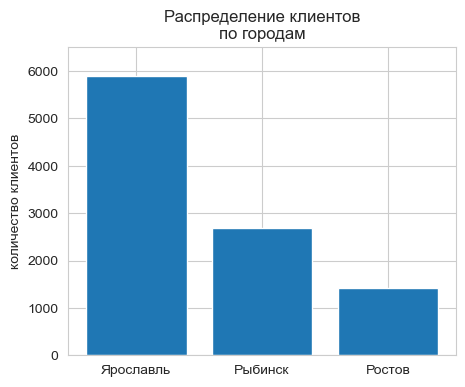

In [34]:
# строим столбчатую диаграмму в разбивке по городам
distribution_by('city');

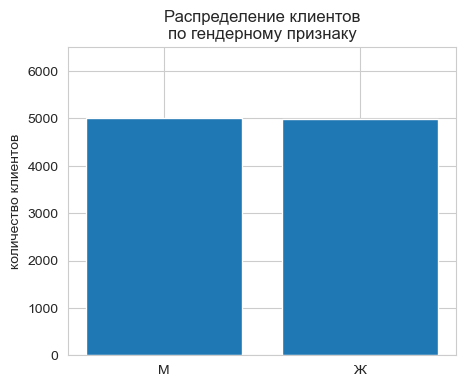

In [35]:
# строим столбчатую диаграмму в разбивке по гендерному признаку
distribution_by('gender');

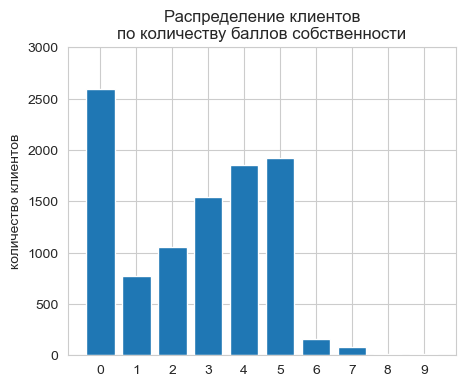

In [36]:
# строим столбчатую диаграмму в разбивке по количеству баллов собственности
distribution_by('equity');

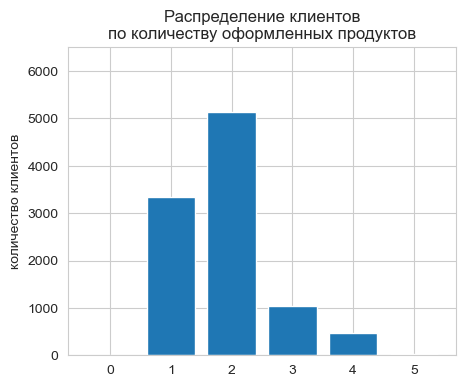

In [37]:
# строим столбчатую диаграмму в разбивке по количеству оформленных продуктов
distribution_by('products');

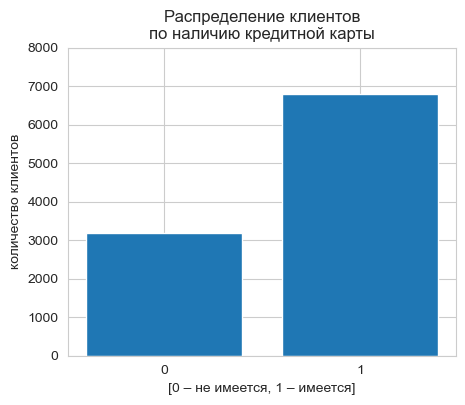

In [38]:
# строим столбчатую диаграмму в разбивке по наличию кредитной карты
distribution_by('credit_card');

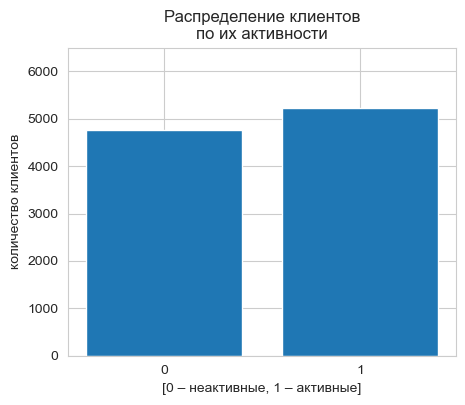

In [39]:
# строим столбчатую диаграмму в зависимости от активности клиентов
distribution_by('last_activity');

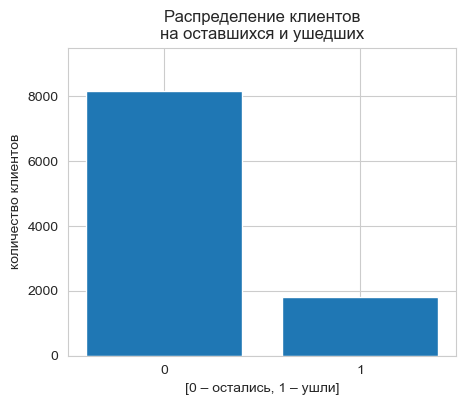

In [40]:
# строим столбчатую диаграмму в разбивке на оставшихя и ушедших
distribution_by('churn');

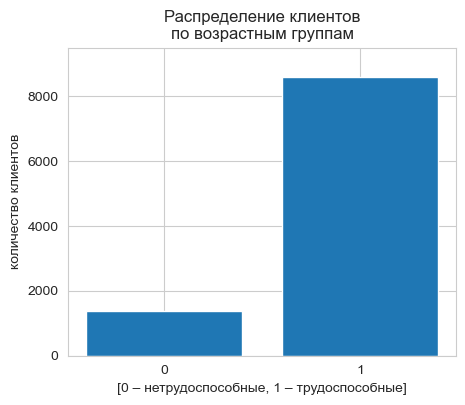

In [41]:
# строим столбчатую диаграмму в разбивке по возрастным группам
distribution_by('age_group');

Подытожим основные характеристики клиентов банка.

- Распределение клиентов по Ярославской области соответствует размеру городов. Больше всего клиентов находятся в Ярославле (почти 60%), меньше всего – в Ростове (около 14%). 
- Мужчин и женщин в выборке почти поровну. 
- Около четверти клиентов не имеют объектов собственности. 
- Около 68% клиентов имеют хотя бы одну кредитную карту, которая учитывается в общем количество продуктов (столбец `products`).
- Соотношение активных и неактивных клиентов практически одинаковое с небольшим перевесом в пользу первых.  
- Отток клиентов находятся на уровне 18%. 

### Портрет клиента банка (в разрезе пола)

Посчитаем различные характеристики клиентов для формирования его портрета в зависимости от гендерного признака.

Соотнесем данные в столбцах `gender` и `age_group`, чтобы узнать количество клиентов трудоспособного возраста среди мужчин и женщин.

In [42]:
# построим новый датафрейм с подсчетом количества клиентов для каждой уникальной группировки отобранных столбцов
gender_and_age_group = (data.groupby(['gender', 'age_group'])
                            .agg({'user_id': 'count'})
                            .rename(columns={'user_id': 'user_counts'})
                            .reset_index())

# добавим новый столбец для подсчета количества клиентов трудоспособного и нетрудоспособного возраста
gender_and_age_group['percentage'] = 0

# считаем долю женщин трудоспособного и нетрудоспособного возраста
gender_and_age_group.loc[gender_and_age_group['gender'] == 'Ж', 
                         'percentage'] = round(gender_and_age_group['user_counts'] * 100 / 
                                              (gender_and_age_group['user_counts'][0] + 
                                               gender_and_age_group['user_counts'][1]), 
                                               1)

# считаем долю мужчин трудоспособного и нетрудоспособного возраста
gender_and_age_group.loc[gender_and_age_group['gender'] == 'М', 
                         'percentage'] = round(gender_and_age_group['user_counts'] * 100 / 
                                               (gender_and_age_group['user_counts'][0] + 
                                                gender_and_age_group['user_counts'][1]), 
                                               1)

# посмотрим на полученный датафрейм
gender_and_age_group

gender  age_group  user_counts  percentage
0      Ж        0.0         1200        24.1
1      Ж        1.0         3783        75.9
2      М        0.0          181         3.6
3      М        1.0         4810        96.5

Исходя из значений в столбце `percentage`, возраст женщин, являющихся клиентами банка, должен быть в среднем выше, чем у мужчин (свой вклад в это вносят и различия в определении трудоспособности для мужчин и женщин). Проверим это после того, как оценим средний возраст клиента банка без учета гендерного признака.

Перед оценкой среднего возраста клиента – посмотрим на выбросы в столбце `age` с помощью стандартного отклонения и диаграммы размаха.

In [43]:
# считаем стандартное отклонение
round(data['age'].std())

12

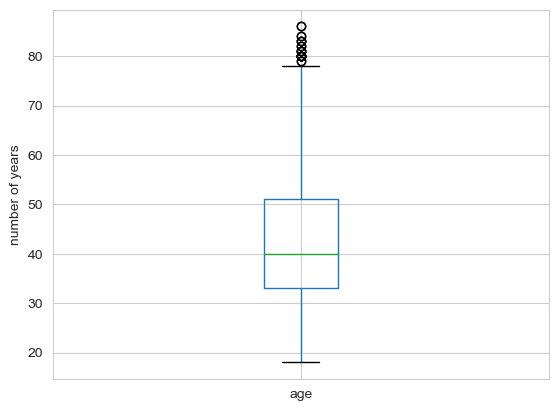

In [44]:
# строим диаграмму размаха с добавлением подписи для оси Y
data.boxplot(column=['age']).set_ylabel('number of years');

В связи с тем, что количество выбросов в столбце `age` небольшое, а также с учетом незначительного количества пропусков (около 0.3%), для формирования портрета клиента используем расчет среднего значения.

In [45]:
# средний возраст клиента
round(data['age'].mean())

43

Посчитаем средний возраст мужчин и женщин, являюшиеся клиентами банка.

In [46]:
# средний возраст мужчин
round(data.query('gender == "М"')['age'].mean())

40

In [47]:
# средний возраст женщин
round(data.query('gender == "Ж"')['age'].mean())

45

Наше предположение подтвердилось: средний возраст женщин, как правило, выше, чем у мужчин (что соответствует распространенному статистическому утверждению, что женщины в среднем живут дольше мужчин). В нашем датасете количество мужчин нетрудоспособного возраста значительно уступает аналогичному показателю противоположного пола.

In [48]:
# количество мужчин нетрудоспособного возраста
len(data.query('age_group == 0 and gender == "М"'))

181

In [49]:
# количество женщин нетрудоспособного возраста
len(data.query('age_group == 0 and gender == "Ж"'))

1200

Посчитаем общее и среднее количество оформленных клиентами продуктов.

In [50]:
# считаем общее количество оформленных продуктов
data['products'].sum()

18701

In [51]:
# среднее количество оформленных продуктов с использованием моды,
# то есть наиболее часто встречающееся количество продуктов
data['products'].value_counts().head(1)

2    5126
Name: products, dtype: int64

Посмотрим, кто чаще оформляет банковские продукты – мужчины или женщины.

In [52]:
# считаем количество продуктов, оформленных мужчинами
data.query('gender == "М"')['products'].sum()

9270

In [53]:
# считаем количество продуктов, оформленных женщинами
data.query('gender == "Ж"')['products'].sum()

9431

Дополнительно узнаем, кто чаще оформляет кредитную карту.

In [54]:
# количество мужчин, имеющих кредитную карту
data.query('gender == "М" and credit_card == 1')['user_id'].count()

3700

In [55]:
# количество женщин, имеющих кредитную карту
data.query('gender == "Ж" and credit_card == 1')['user_id'].count()

3104

Посчитаем среднее количество баллов собственности среди всех клиентов банка.

In [56]:
# считаем среднее количество баллов собственности
round(data['equity'].mean(), 1)

2.6

Среднее количество баллов собственности для мужчин и женщин практически одинаковое.

In [57]:
# считаем среднее количество баллов собственности для мужчин
round(data[data['gender'] == "М"]['equity'].mean(), 1)

2.6

In [58]:
# считаем среднее количество баллов собственности для женщин
round(data[data['gender'] == "Ж"]['equity'].mean(), 1)

2.7

Оценим размер заработной платы клиентов в столбце `est_salary`. 

Значения в этом столбце сильно разбросаны, что наглядно видно на диаграмме размаха.

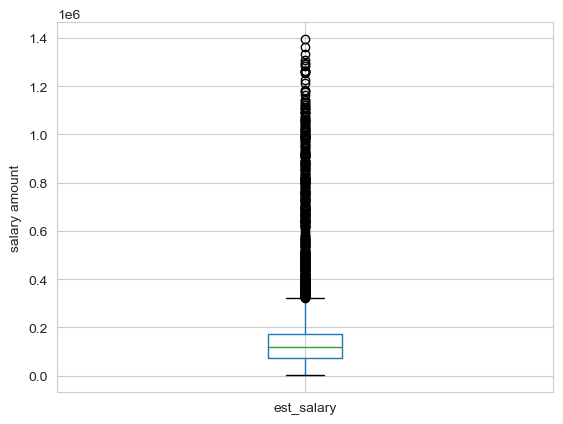

In [59]:
# строим диаграмму размаха для оценочных значений заработной платы клиентов
data.boxplot(column=['est_salary']).set_ylabel('salary amount');

По этой причине для оценки доходов используем медиану.

In [60]:
# считаем медиану оценочных значений заработной платы клиентов
round(data['est_salary'].median())

119658

Узнаем, есть ли различие в доходах между между мужчинами и женщинами.

In [61]:
# медиана оценочной заработной платы мужчин
round(data.query('gender == "М"')['est_salary'].median())

129374

In [62]:
# медиана оценочной заработной платы женщин
round(data.query('gender == "Ж"')['est_salary'].median())

111443

И напоследок узнаем, кто чаще уходит из банка – женщины или мужчины.

In [63]:
# считаем количество ушедших из банка мужчин
data.query('churn == 1 and gender == "М"')['user_id'].count()

1183

In [64]:
# считаем количество ушедших из банка женщин
data.query('churn == 1 and gender == "Ж"')['user_id'].count()

637

Подытожим основные характеристики клиентов банка с учетом гендерного критерия. 

- Мужчин и женщин в выборке практически поровну. 

- Средний возраст клиента – 43 года. Женщины, как правило, старше мужчин – 45 против 40. 

- Общее количество продуктов, оформленных клиентами банка, – 18.7 тыс. На одного клиента в среднем приходится примерно по 2 продукта. Доля банковских продуктов, оформленных мужчинами и женщинами, практически одинакова.

- Мужчины чаще женщин оформляют кредитную карту – примерно на 20%.

- Среднее количество баллов собственности – 3. Между мужчинами и женщинами по этому показателю нет существенной разницы.

- Доля клиентов, отнесенных к трудоспособным, составляет 86%. Мужчины чаще женщин находятся в возрастной категории, определяемой как трудоспособная, – 96.5% против 75.9%.

- Уровень заработной платы клиентов банка проходит по медианному значению в 120 тыс. руб. В среднем мужчины зарабатывают больше женщин: медианные значения отличаются на 16%.

- Мужчины чаще уходят из банка, чем женщины – 1183 против 637.

### Портрет клиента банка (в разрезе оттока)

Cоздадим функцию `consumers_by_churn` для изучения отличий между оставшимися и ушедшими клиентами по следующим характеристикам:
- `city`,
- `gender`,
- `credit_card`,
- `last_activity`.

In [65]:
def consumers_by_churn(column):
    
    # создаем датафрейм
    data_by_churn = (data.groupby(['churn', column])
                         .agg({'user_id': 'count'})
                         .rename(columns={'user_id': 'user_counts'})
                         .sort_values(by=['churn', column])
                         .reset_index())
    
    # задаем название для нового столбца
    column_name = 'percentage_by_' + column
    
    # добавляем в датафрейм новый столбец для расчета относительных значений
    data_by_churn[column_name] = 0
    
    # считаем относительные значения для столбца column_name
    for value in data_by_churn[column]:
        data_by_churn.loc[data_by_churn[column] == value, column_name] = round((data_by_churn['user_counts'] * 100 /
                                                                                len(data[data[column] == value])),
                                                                               2)
    
    return data_by_churn

In [66]:
# применим функцию для изучения оставшихся и ушедших клиентов в разбивке по городам
consumers_by_churn('city')

churn       city  user_counts  percentage_by_city
0      0     Ростов         1151               81.23
1      0    Рыбинск         2258               83.78
2      0  Ярославль         4771               81.03
3      1     Ростов          266               18.77
4      1    Рыбинск          437               16.22
5      1  Ярославль         1117               18.97

In [67]:
# применим функцию для изучения оставшихся и ушедших клиентов в разбивке по гендерному признаку 
consumers_by_churn('gender')

churn gender  user_counts  percentage_by_gender
0      0      Ж         4358                 87.25
1      0      М         3822                 76.36
2      1      Ж          637                 12.75
3      1      М         1183                 23.64

In [68]:
# применим функцию для изучения оставшихся и ушедших клиентов в разбивке по наличию кредитной карты
consumers_by_churn('credit_card')

churn  credit_card  user_counts  percentage_by_credit_card
0      0            0         2379                      74.44
1      0            1         5801                      85.26
2      1            0          817                      25.56
3      1            1         1003                      14.74

In [69]:
# применим функцию для изучения оставшихся и ушедших клиентов в разбивке по наличию активности
consumers_by_churn('last_activity')

churn  last_activity  user_counts  percentage_by_last_activity
0      0              0         4223                        88.63
1      0              1         3957                        75.59
2      1              0          542                        11.37
3      1              1         1278                        24.41

In [70]:
# считаем средний возраст оставшихся и ушедших клиентов
round(data.groupby('churn').agg({'age': 'mean'}), 1).reset_index()

churn   age
0      0  43.0
1      1  41.5

In [71]:
# считаем среднее количество баллов собственности оставшихся и ушедших клиентов
round(data.groupby('churn').agg({'equity': 'mean'}), 1).reset_index()

churn  equity
0      0     2.4
1      1     3.8

In [72]:
# считаем частоту количества банковских продуктов для оставшихся и ушедших клиентов
(data.groupby(['churn', 'products'])
     .agg({'products': 'count'})
     .rename(columns={'products': 'quantity'}))

quantity
churn products          
0     1             3106
      2             4147
      3              742
      4              174
      5               11
1     0                1
      1              235
      2              979
      3              297
      4              300
      5                8

In [73]:
# считаем медианное значение остатков на счете для оставшихся и ушедших клиентов
round(data.groupby('churn').agg({'balance': 'median'}), 1).reset_index()

churn   balance
0      0  475382.4
1      1  782410.5

In [74]:
# считаем медианное значение доходов на счете для оставшихся и ушедших клиентов
round(data.groupby('churn').agg({'est_salary': 'median'}), 1).reset_index()

churn  est_salary
0      0    118257.7
1      1    125390.6

In [75]:
# считаем медианное значение кредитного рейтинга оставшихся и ушедших клиентов
round(data.groupby('churn').agg({'score': 'mean'}), 1).reset_index()

churn  score
0      0  845.4
1      1  863.4

Подытожим основные характеристики клиентов банкав в разрезе оттока.
- Отток клиентов в каждом из городов находится примерно на одном уровне (16-19%).
- Почти четверть мужчин, пришедших в банк, спустя какое-то время принимает решение уйти. Женщины в два раза реже принимают такое решение.
- Клиенты без кредитных карт чаще уходят из банка, чем клиенты с кредитными картами, – 26% против 15% (от общего количества клиентов в зависимости от отсутствия и наличия кредитных карт соответственно).
- Клиенты с активностью в два раза чаще уходят из банка, чем клиенты без активности.
- Средний возраст оставшихся и ушедших клиентов не имеет существенных различий – 43 против 41.5.
- Ушедшие клиенты, как правило, имеют существенно больше объектов собственности – почти на 60% больше, чем аналогичный показатель для оставшихся клиентов.
- Чаще всего и ушедшие, и оставшиеся клиенты имеют по два банковских продукта.
- Остатки на счетах ушедших клиентов существенно выше: их медианное значение выше аналогичного показателя для оставшихся клиентов почти на 65%.
- Доходы оставшихся и ушедших клиентов существенно не отличаются: разница составляет не более 6 п.п.
- Значения кредитного скоринга находятся практически на одном уровне: разница не превышает 3 п.п.

### Корреляционный анализ

Изучим, как те или иные характеристики клиентов влияют на их решения уйти из банка (столбец `churn`). 

Построим тепловую карту с расчетом коэффициентов корреляций для каждой пары столбцов в датасете.

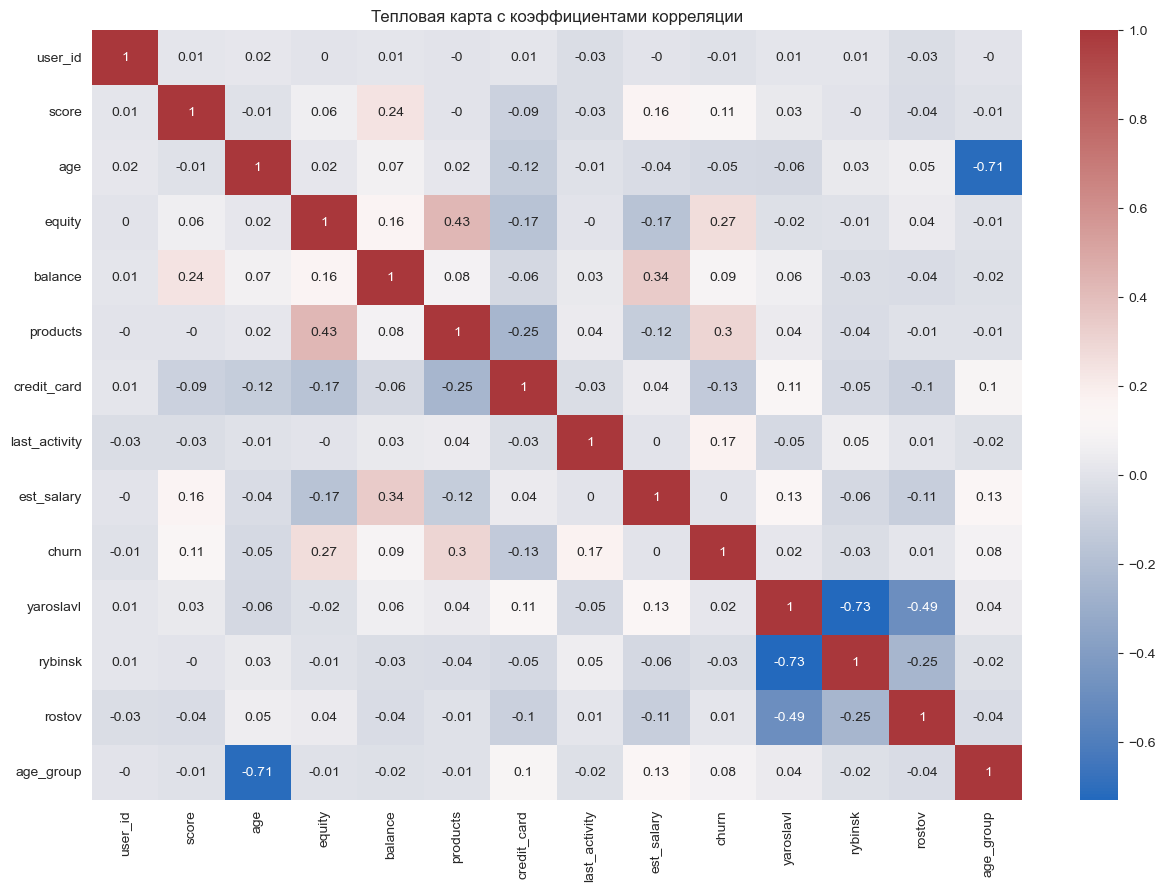

In [76]:
# сохранием в переменную коэффициенты корреляций для каждой пары столбцов в датасете
corr = data.corr().round(2)

# зададим размер тепловой карты
plt.figure(figsize=(15, 10))

# выведем на тепловую карту рассчитанные коэффциенты корреляций
sns.heatmap(corr, annot=True, cmap='vlag').set_title('Тепловая карта с коэффициентами корреляции');

Отфильтруем тепловую карту, оставив в ней только значения коэффициентов корреляции для столбца `churn`.

<Figure size 1500x1000 with 0 Axes>

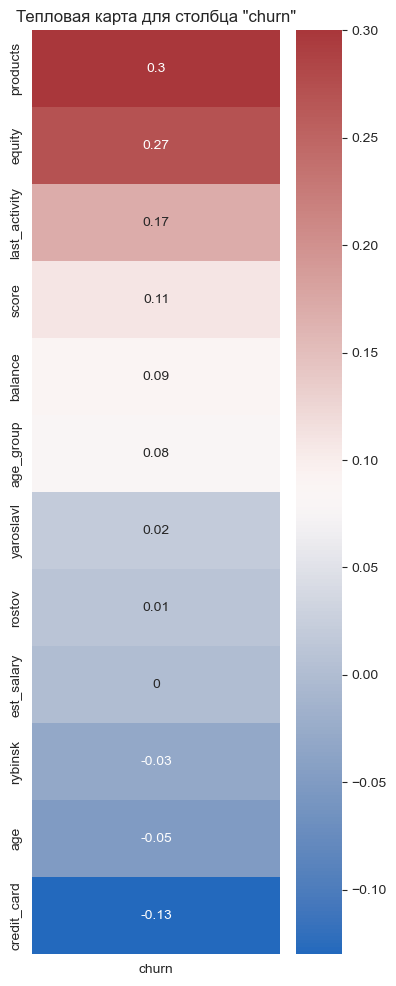

In [77]:
# сохранием в переменную коэффициенты корреляций для каждой пары столбцов в датасете
corr = data.corr().round(2).filter(regex = 'churn', axis=1).sort_values(by='churn', ascending=False)
corr = corr.drop('churn', axis=0)
corr = corr.drop('user_id', axis=0)

# зададим размер тепловой карты
plt.figure(figsize=(15, 10))

# выведем на тепловую карту рассчитанные коэффциенты корреляций
plt.subplots(figsize=(4, 12))
sns.heatmap(corr, annot=True, cmap='vlag').set_title('Тепловая карта для столбца "churn"');

Из построенной корреляционной матрицы отберем все значения коэффициентов по линии `churn`, которые превышают отметку в 10%. 

В четырех случаях зафиксирована положительная корреляция и в одном случае – отрицательная:
- `score`: 11%,
- `equity`: 27%,
- `products`: 30%,
- `last_activity`: 17%,
- `credit_card`: -13%.

По [шкале Чедокка](https://www.researchgate.net/figure/Chaddock-scale-for-interpretation-of-correlation-analysis-results_tbl2_358611944) все обнаруженные корреляции относятся к слабым типам связи (от 10 до 30%).

Примечательно, что величина заработной платы клиента (столбец `est_salary`) не влияет, исходя из нулевого значения коэффициента корреляции, на отток клиентов из банка. Нам неизвестно, имеется ли в банке отдел, работающий с состоятельными клиентами (*private banking*), но вероятность наличия такого отдела в небольшом (исходя их количества городов представления) региональном банке, на наш взгляд, является низкой. Клиенты с высокой заработной платой (например, более 500 тыс. руб. в месяц), как правило, склонны менять банк в поиске лучших условий и более комфортного сервиса, чего в нашем случае не зафиксировано. Для более детального изучения взаимосвязи уровня заработной платы и поведения клиентов необходимо запросить дополнительную информацию.

In [78]:
# расчет основных значений для столбца "est_salary"
round(data['est_salary'].describe() )

count      10000.0
mean      147867.0
std       139389.0
min         2546.0
25%        75252.0
50%       119658.0
75%       174501.0
max      1395064.0
Name: est_salary, dtype: float64

Рассмотрим подробнее каждый случай выявленной корреляции и попробуем их объяснить. Но перед этим отметим, что наличие – хоть какой-либо – корреляции между двумя переменными не означает наличия причинно-следственной связи между ними (иными словами, корреляция не есть каузация).

Корреляция между последней активностью клиента (столбец `last_activity`) и его решением уйти из банка (столбец `churn`) (17%) может быть связана с необходимостью проведения обязательных операций перед своим уходом: вывод остатка со счета, закрытие счета и/или банковской карты, внесение завершающего платежа по кредитной карте и пр. 

Рост количества оформленных банковских продуктов (столбец `products`) оказывает негативное влияние на отток клиентов из банка. Этот параметр имеет самое сильное воздействие на отток клиентов – 30%. Корреляция в данном случае может быть связана со снижением качества оказываемых услуг (учитывая, что сервисы – не самамя сильная сторона региональных банков в России) при увеличении используемых банковских продуктов: качество обслуживания снижается, недовольство клиента возрастает и он задумывается о смене банка.

Следующий параметр, имеющий также слабую силу воздействия на отток клиентов, – значение баллов кредитного скоринга (столбец `score`) (11%). Одним из критериев деления банков на рынке кредитных продуктов является работа с POS-кредитами. Банки, которые выдают такие кредиты, предъявляют, как правило, более заниженные требования к значению кредитного скоринга заемщиков, компенсируя это высокой ставкой процента. Частично – в рамках нашего предположения – это может относиться и к «Метанпромбанку». Рост баллов кредитного скоринга, вызванный, например, увеличением  имущества и своевременным внесением очередного платежа по кредиту, стимулирует клиентов банка переходить в другой банк, предлагающий более комфортные и выгодные условия по сравнению с прежним. Эту гипотезу отчасти подтверждает и наличие корреляции между количеством баллов собственности (столбец `equity`) и оттоком клиентов (27%). 

Отрицательная корреляция между наличием кредитной карты (столбец `credit_card`) и оттоком клиентов из банка (13%) может быть связана с отказами банка в выдаче кредитного продукта: в такой ситуации клиент-заемщик – в поиске кредитных средств – уходит из банка и обращается в другой.

Для более вероятного и детального объяснения причин отмеченных взаимосвязей необходима дополнительная информация – не только детализация имеющейся в датасете (например, среднее значение баллов кредитного скоринга, как меняются баллы собственности клиентов во времени, конкретизация банковских продуктов и пр.), но и значения иных факторов, характеризующих клиентов (отнесение полученного датасета к какому-то временному промежутку с возможностью изучения причин оттока клиентов с учетом внешних обстоятельств, информация об обращениях и жалобах клиентов, частота отказа в выдаче кредитных продуктов, обратная связь о качестве сервисов и оказываемых услугах, расположение офисов и банкоматов в городе и пр.).

Дополнительно выделим значения корреляции, которые – по шкале Чедокка – выше 30%. На тепловой карте есть два таких случая, которые относятся к умеренным силам связи (30-50%):
- между `est_salary` и `balance` – 34%, 
- между `equity` и `products` – 43%.

Первая взаимосвязь кажется логичной: чем выше доход клиента, тем выше в среднем и остаток на его счете. При наличии более релевантной информации об остатке средств на счете (столбец `balance`) и отсутствии пропусков в этом столбце – коэффициент корреляции, скорей всего, был бы отчетливее.

Вторая взаимосвязь может быть объяснена так: чем больше собственности у клиента, тем чаще банк выносит положительные заключения об оформлении ему новых продуктов, поскольку у того имеется соответствующее обеспечение. 

### Изучение характеристик клиентов в разрезе оттока

Построим гистограмму методом `sns.histplot` для каждой количественной характеристики клиента со следующими параметрами:
- `kde=True`,
- `stat='density'`,
- `common_norm=False`.

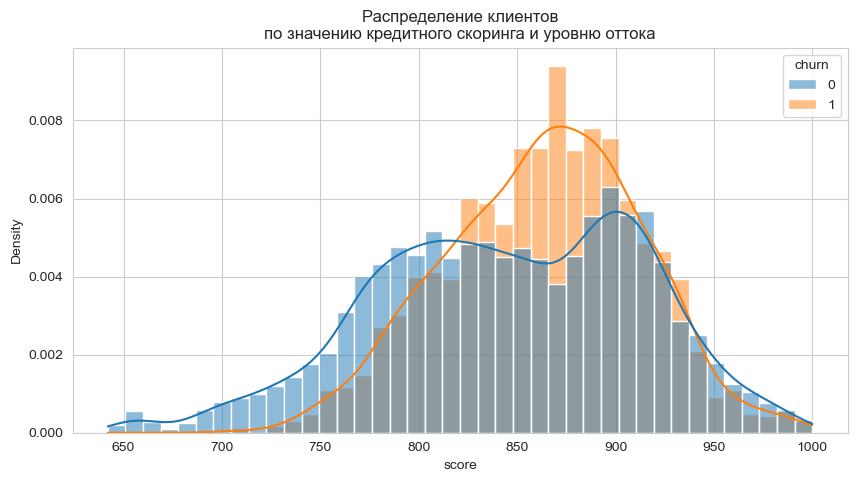

In [79]:
# установим размер гистограммы
plt.figure(figsize=(10, 5))

# строим гистограмму по значениям баллов кредитного скоринга
sns.histplot(data=data, x='score',  hue='churn', kde=True, stat='density', common_norm=False)
         
# зафиксируем необходимость проставления метки для каждого столбца на оси X
plt.title('Распределение клиентов\nпо значению кредитного скоринга и уровню оттока');

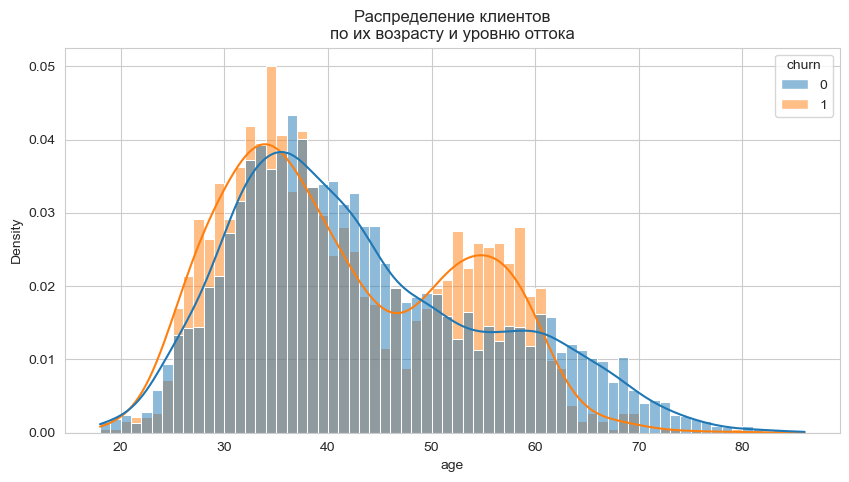

In [80]:
# установим размер гистограммы
plt.figure(figsize=(10, 5))

# строим гистограмму по возрасту клиентов
sns.histplot(data=data, x='age',  hue='churn', kde=True, stat='density', common_norm=False, binwidth = 1)
plt.title('Распределение клиентов\nпо их возрасту и уровню оттока');

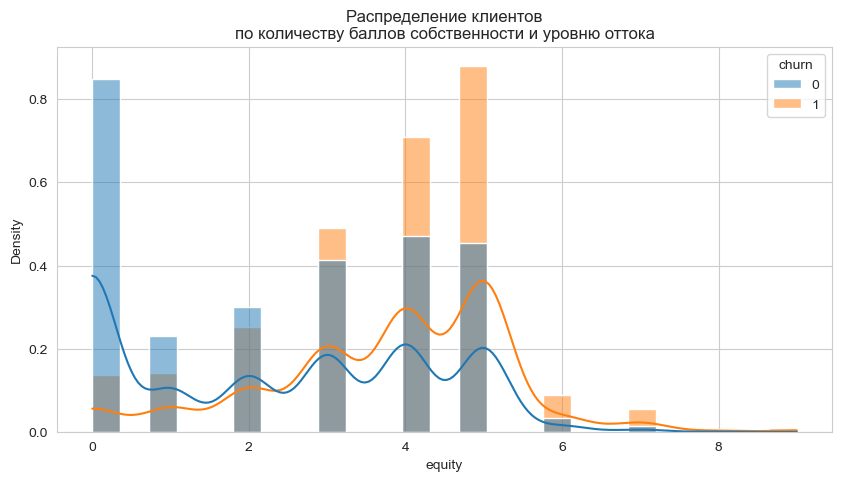

In [81]:
# установим размер гистограммы
plt.figure(figsize=(10, 5))

# строим гистограмму по количеству баллов собственности
sns.histplot(data=data, x='equity',  hue='churn', kde=True, stat='density', common_norm=False)
plt.title('Распределение клиентов\nпо количеству баллов собственности и уровню оттока');

**Если вы перешли сюда по ссылке из пункта 6.2.3, то воспользуйтесь обратной [ссылкой](#six_two_three).**
<a id="four_five"></a> 

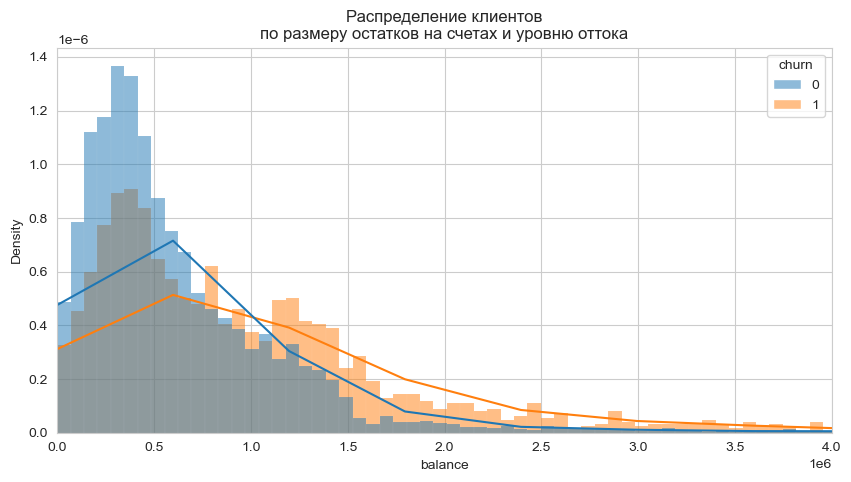

In [82]:
# установим размер гистограммы
plt.figure(figsize=(10, 5))

# строим гистограмму по остаткам клиентов на счетах
sns.histplot(data=data, x='balance',  hue='churn', kde=True, stat='density', common_norm=False)
plt.xlim([0, 4000000])
plt.title('Распределение клиентов\nпо размеру остатков на счетах и уровню оттока');

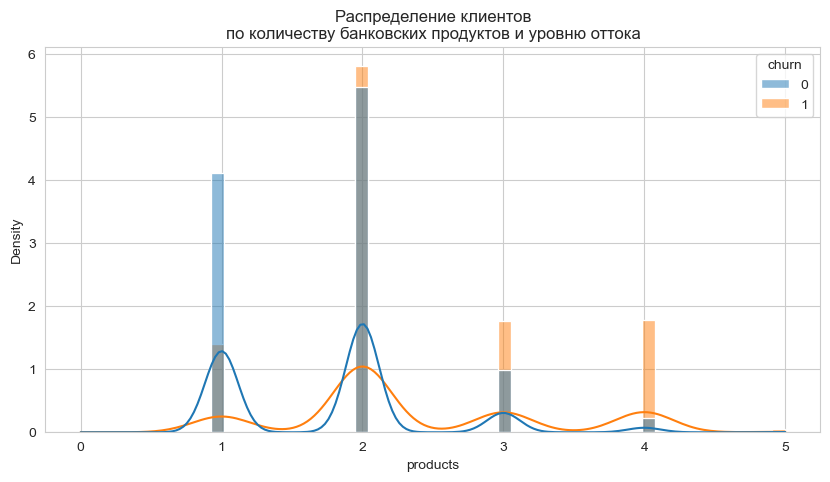

In [83]:
# установим размер гистограммы
plt.figure(figsize=(10, 5))

# строим гистограмму по остаткам клиентов на счетах
sns.histplot(data=data, x='products',  hue='churn', kde=True, stat='density', common_norm=False)
plt.title('Распределение клиентов\nпо количеству банковских продуктов и уровню оттока');

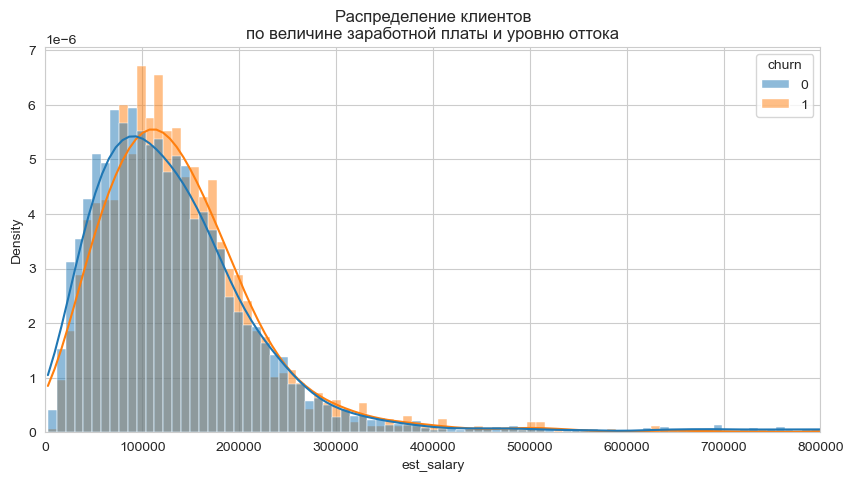

In [84]:
# установим размер гистограммы
plt.figure(figsize=(10, 5))

# строим гистограмму по величине заработной платы
sns.histplot(data=data, x='est_salary',  hue='churn', kde=True, stat='density', common_norm=False)
plt.xlim([0, 800000])
plt.title('Распределение клиентов\nпо величине заработной платы и уровню оттока');

Посчитаем уровень оттока по категориальным характеристикам клиентов, для чего применим ранее написанную функцию `consumers_by_churn`. Но перед этим сохраним в переменную `outflow` средний уровень оттока по банку в целом, чтобы затем вывести ее на диаграммах.

In [85]:
# считаем и сохраняем в переменную средний уровень оттока по банку в целом
outflow =round(len(data.query('churn == 1')) * 100 / len(data), 2)
outflow

18.2

In [86]:
# создаем датафрейм для изучения ушедших клиентов в разбивке по гендерному признаку 
data_by_churn_and_gender = consumers_by_churn('gender')
data_by_churn_and_gender

churn gender  user_counts  percentage_by_gender
0      0      Ж         4358                 87.25
1      0      М         3822                 76.36
2      1      Ж          637                 12.75
3      1      М         1183                 23.64

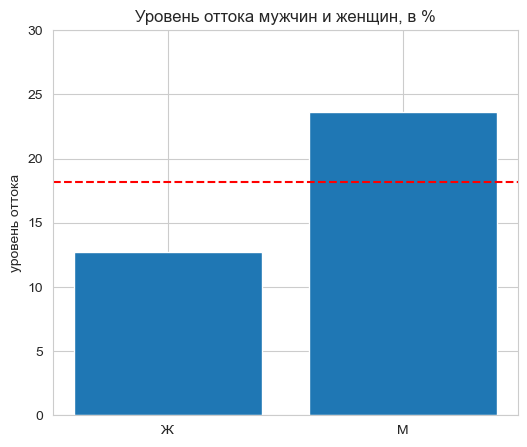

In [87]:
# строим столбчатую диаграмму для сравнения уровней оттока мужчин и женщин
# в сопоставлении со средним уровнем оттока по банку в целом
plt.figure(figsize=(6, 5))
plt.bar(data_by_churn_and_gender.query('churn == 1')['gender'],
        data_by_churn_and_gender.query('churn == 1')['percentage_by_gender'])  
plt.xticks(data_by_churn_and_gender.query('churn == 1')['gender'])
plt.axhline(y=outflow, color='red', linestyle='--') 
plt.ylim([0, 30])
plt.ylabel('уровень оттока') 
plt.title('Уровень оттока мужчин и женщин, в %');

In [88]:
# создаем датафрейм для изучения ушедших клиентов в разбивке по наличию/отсутствию кредитной карты
data_by_churn_and_credit_card = consumers_by_churn('credit_card')
data_by_churn_and_credit_card

churn  credit_card  user_counts  percentage_by_credit_card
0      0            0         2379                      74.44
1      0            1         5801                      85.26
2      1            0          817                      25.56
3      1            1         1003                      14.74

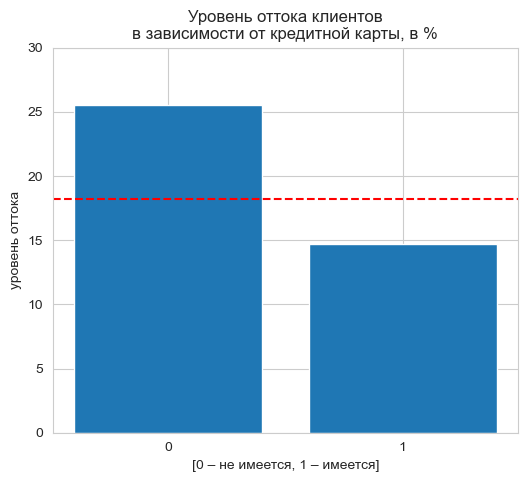

In [89]:
# строим столбчатую диаграмму для сравнения уровней оттока клиентов по критерию наличия/отсутствия кредитной карты
# в сопоставлении со средним уровнем оттока по банку в целом
plt.figure(figsize=(6, 5))
plt.bar(data_by_churn_and_credit_card.query('churn == 1')['credit_card'],
        data_by_churn_and_credit_card.query('churn == 1')['percentage_by_credit_card'])  
plt.xticks(data_by_churn_and_credit_card.query('churn == 1')['credit_card'])
plt.axhline(y=outflow, color='red', linestyle='--') 
plt.ylim([0, 30])
plt.ylabel('уровень оттока') 
plt.xlabel('[0 – не имеется, 1 – имеется]')
plt.title('Уровень оттока клиентов\nв зависимости от кредитной карты, в %');

In [90]:
# создаем датафрейм для изучения оставшихся и ушедших клиентов в зависимости от их активности
data_by_churn_and_last_activity = consumers_by_churn('last_activity')
data_by_churn_and_last_activity

churn  last_activity  user_counts  percentage_by_last_activity
0      0              0         4223                        88.63
1      0              1         3957                        75.59
2      1              0          542                        11.37
3      1              1         1278                        24.41

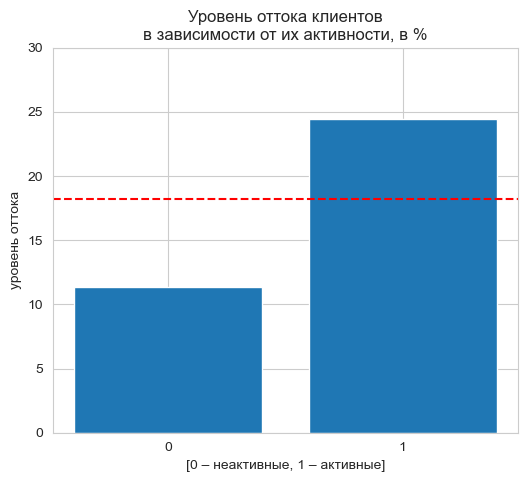

In [91]:
# строим столбчатую диаграмму для сравнения уровней оттока клиентов в зависимости от их активности
# в сопоставлении со средним уровнем оттока по банку в целом
plt.figure(figsize=(6, 5))
plt.bar(data_by_churn_and_last_activity.query('churn == 1')['last_activity'],
        data_by_churn_and_last_activity.query('churn == 1')['percentage_by_last_activity'])  
plt.xticks(data_by_churn_and_last_activity.query('churn == 1')['last_activity'])
plt.axhline(y=outflow, color='red', linestyle='--') 
plt.ylim([0, 30])
plt.ylabel('уровень оттока') 
plt.xlabel('[0 – неактивные, 1 – активные]')
plt.title('Уровень оттока клиентов\nв зависимости от их активности, в %');

Высокий уровень оттока наблюдается среди клиентов со следующими количественными характеристиками:
- значение кредитного скоринга – 820-920 баллов,
- возраст – от 22 до 35 лет и от 50 до 60 лет,
- количество баллов собственности – не менее 3,
- остаток средств на счете – более 1 млн.,
- количество банковских продуктов – не менее 3,
- размер заработной платы – от 1 млн. до 2.5 млн.

Анализ остальных характеристик показал, что уровень оттока – выше среднего по банку (18%) – наблюдается у следующих категорий клиентов:
- клиенты-мужчины,
- клиенты, не имеющие кредитной карты,
- клиенты, имеющие активность в последнее время. 

### Краткие выводы

Соотношение мужчин и женщин среди клиентов банка одинаковое (в разбивке по гендерному признаку и городам – разница не более 8%). Средний возраст женщин, как правило, выше, чем у мужчин. Доля клиентов, отнесенная к трудоспособному (предпенсионному) возрасту, составляет 86%. И мужчины, и женщины оформили одинаковое количество банковских продуктов. Хотя бы одну кредитную карту имеют 68% клиентов, мужчины на 20% их оформляют чаще, чем женщины. Между мужчинами и женщинами нет существенных различий в количестве объектов собственности. Медианное значение заработной платы клиентов проходим по уровню в 120 тыс. руб., при этом мужчины в среднем зарабатывают больше, чем женщины. 

Отток клиентов из банка находится на уровне в 18%. Мужчины значительно чаще женщин принимают решение уйти из банка. Уровень оттока во всех городах находится на одинаковом уровне (16-19%). Средний возраст оставшихся и ушедших клиентов не имеет существенных различий. Чаще всего и ушедшие, и оставшиеся клиенты имеют по два банковских продукта. Клиенты без кредитных карт чаще уходят из банка, чем клиенты с кредитными картами. Ушедшие клиенты, как правило, имеют существенно больше объектов собственности. В доходах оставшихся и ушедших клиентов существенной разницы не зафиксировано.

Корреляционный анализ показал, что те или иные характеристики клиентов в целом оказывают слабое воздействие на отток клиентов из банка (не более 30%). На тепловой карте зафиксировано четыре случая положительной корреляции (столбцы `score`, `equity`, `products`, `last_activity`) и один случай отрицательной (столбец `credit_card`).

Умеренная сила связи (от 30 до 50%) зафиксирована лишь между остатком на счете клиента и его доходом, а также между объемом собственности клиента и оформленными им продуктами.


## Проверка статистических гипотез 

**Для возврата к оглавлению нажмите [сюда](#contents).**

Изучим, имеются ли статистически значимые различия в характеристиках клиентов – оставшихся и ушедших.

### Гипотеза о равенстве доходов

Первая статистическая гипотеза состоит в проверке наличия или отсутствия различий в доходах (`est_salary`) между оставшимися и ушедшими клиентами. 

Сформулируем нулевую (`H0`) и альтернативную (или конкурирующую) (`H1`) гипотезы:
- H0 – средние доходы оставшихся и ушедших клиентов совпадают,
- H1 – средние доходы оставшихся и ушедших клиентов не совпадают.

Критерий статистической значимости (`alpha`) зафиксируем на уровне 0.05 (или 5%).

Для проверки статистической гипотезы используем параметрический `t-критерий Стьюдента`, поскольку необходимо сравнить между собой две независимые совокупности, содержащие количественные данные и имеющие относительно нормальное распределение. Независимость совокупностей означает, что в каждой из совокупностей находятся разные клиенты.

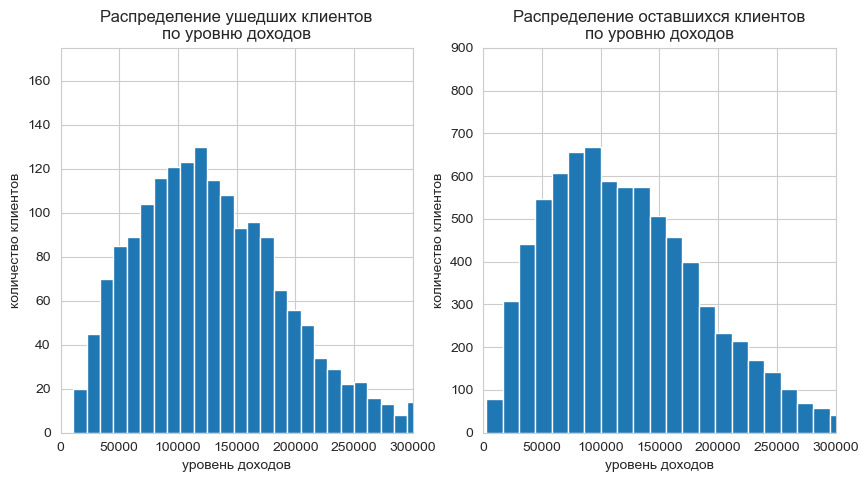

In [92]:
# установим размер гистограммы
plt.figure(figsize=(10, 5))

# построим гистограмму для доходов ушедших клиентов
plt.subplot(1, 2, 1)
plt.hist(data.query('churn == 1')['est_salary'], bins = 110)
plt.title('Распределение ушедших клиентов\nпо уровню доходов')
plt.xlabel('уровень доходов')
plt.ylabel('количество клиентов')
plt.ylim([0, 175])
plt.xlim([0, 300000])

# построим гистограмму для доходов оставшихся клиентов
plt.subplot(1, 2, 2)
plt.hist(data.query('churn == 0')['est_salary'], bins = 100)
plt.title('Распределение оставшихся клиентов\nпо уровню доходов')
plt.xlabel('уровень доходов')
plt.ylabel('количество клиентов')
plt.ylim([0, 900])
plt.xlim([0, 300000]);

Сохраним в переменные данные о доходах каждой совокупности и посчитаем дисперсию для каждой из них, чтобы корректно задать параметр `equal_var` в выбранном методе.

In [93]:
# сформируем две таблицы для оставшихся и ушедших клиентов соответственно
customers_yes_salary = data.query('churn == 0')['est_salary']
customers_not_salary = data.query('churn == 1')['est_salary']

# считаем дисперсию для каждой из таблиц
display(variance(customers_yes_salary))
variance(customers_not_salary)

20392519451.4559

15107976364.850912

Поскольку размеры выборки для оставшихся и ушедших клиентов отличаются (82% против 18%), а между их дисперсиями имеется различие (около 35%), то установим параметр `equal_var` как `False`. 

In [94]:
# вызовем метод для проверки гипотезы
results = st.ttest_ind(customers_yes_salary, 
                       customers_not_salary, 
                       equal_var=False)

# зададим значение уровня значимости
alpha = 0.05 

# выведем значение p-value на экран 
print(results.pvalue)

# напишем условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

0.8887054822123845
Не получилось отвергнуть нулевую гипотезу.


Нулевая гипотеза не отвергнута, а значит нет статистически значимых различий между доходами оставшихся и ушедших клиентов, что соответствует нулевому значению коэффициента корреляции.

Проверим ту же самую статистическую гипотезу с помощью непараметрического `U-критерия Манна-Уитни`. 

In [95]:
alpha = 0.05  # критический уровень статистической значимости

# вызовем метод для проверки гипотезы
results = st.mannwhitneyu(customers_yes_salary, customers_not_salary)

# выведем значение p-value на экран 
print('p-значение: ', results.pvalue)

# напишем условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение:  0.000243559272811695
Отвергаем нулевую гипотезу.


Тест Манна-Уитни, наоборот, отвергает нулевую гипотезу в пользу альтернативной и утверждает, что между доходами оставшихся и ушедших клиентов присутствует статистически значимая разница.

Выбирая между двумя статистическими критериями, более приоритетным будет `t-критерий Стьюдента`, поскольку он точнее подходит для сравниваемых совокупностей. `Тест Манна-Уитни`, как правило, применяется на небольших выборках, при отсутствии нормального распределения и хуже интерпретируется для бизнеса.

### Гипотеза о равенстве возраста

Вторая статистическая гипотеза состоит в проверке наличия или отсутствия различий в возрасте (`age`) оставшихся и ушедших клиентов. 

Сформулируем нулевую (`H0`) и альтернативную (`H1`) гипотезы:
- H0 – средний возраст оставшихся и ушедших клиентов совпадает,
- H1 – средний возраст оставшихся и ушедших клиентов не совпадает.

Критерий статистической значимости (`alpha`) зафиксируем на уровне 0.05 (или 5%).

В рамках данной проверки необходимо сравнить между собой две независимые совокупности, содержащие количественные данные. При этом одна из совокупностей имеет относительно нормальное распределение, а вторая – бимодальное. 

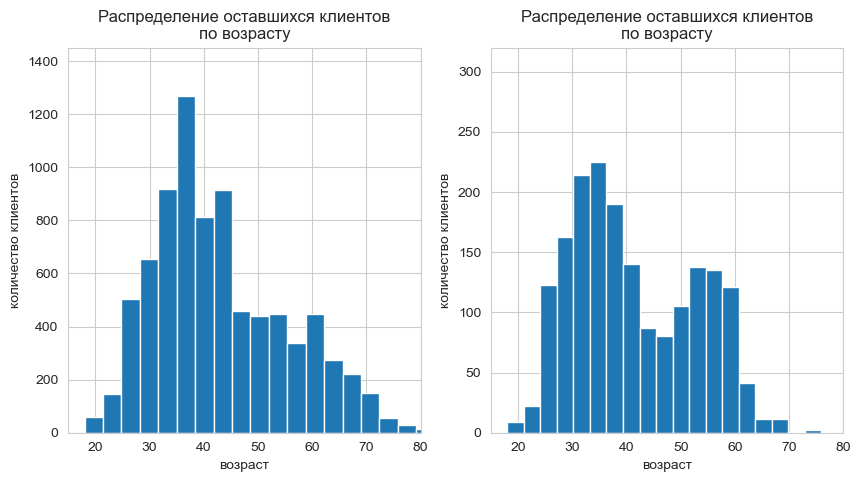

In [96]:
# установим размер гистограммы
plt.figure(figsize=(10, 5))

# построим гистограмму по возрасту оставшихся клиентов
plt.subplot(1, 2, 1)
plt.hist(data.query('churn == 0')['age'], bins = 20)
plt.title('Распределение оставшихся клиентов\nпо возрасту')
plt.xlabel('возраст')
plt.ylabel('количество клиентов')
plt.ylim([0, 1450])
plt.xlim([15, 80])

# построим гистограмму по возрасту оставшихся клиентов
plt.subplot(1, 2, 2)
plt.hist(data.query('churn == 1')['age'], bins = 20)
plt.title('Распределение оставшихся клиентов\nпо возрасту')
plt.xlabel('возраст')
plt.ylabel('количество клиентов')
plt.ylim([0, 320])
plt.xlim([15, 80]);

Для проверки второй статистической гипотезы также остановимся на параметрическом `t-критерии Стьюдента`.

Сохраним в переменные данные о возрасте клиентов для каждой совокупности и рассчитаем `pvalue`, исключив предварительно из них пропуски (0.3%).

In [97]:
customers_yes_age = data.dropna(subset=['age']).query('churn == 0')['age']
customers_not_age = data.dropna(subset=['age']).query('churn == 1')['age']

Параметр `equal_var` в выбранном методе установим как `False`, поскольку размер совокупностей отличается, а между дисперсиями имеются различия. 

In [98]:
# считаем дисперсию для каждой из таблиц
display(variance(customers_yes_age))
variance(customers_not_age)

153.14575130756242

124.91322738650996

In [99]:
# вызовем метод для проверки гипотезы
results = st.ttest_ind(customers_yes_age, 
                       customers_not_age, 
                       equal_var=False)

# зададим значение уровня значимости
alpha = 0.05 

# выведем значение p-value на экран 
print(results.pvalue)

# напишем условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

1.1721656853879547e-07
Отвергаем нулевую гипотезу.


Нулевая гипотеза отвергнута, а значит между значениями среднего возраста оставшихся и ушедших клиентов имеется статистически значимое различие.

### Гипотеза о равенстве количества банковских продуктов

Третья статистическая гипотеза состоит в проверке наличия или отсутствия различий в количестве оформленных банковских продуктов (`products`) между оставшимися и ушедшими клиентами.

Сформулируем нулевую (`H0`) и альтернативную (`H1`) гипотезы:
- H0 – среднее количество продуктов, оформленных оставшимися и ушедшими клиентами, совпадает,
- H1 – среднее количество продуктов, оформленных оставшимися и ушедшими клиентами, не совпадает.

Критерий статистической значимости (`alpha`) зафиксируем на уровне 0.05 (или 5%).

Для проверки этой гипотезы используем `t-критерий Стьюдента`.

Поскольку размер выборки для оставшихся и ушедших клиентов отличается, а между их дисперсиями имеется различие, то установим параметр `equal_var` как `False`. 

In [100]:
# считаем дисперсию для каждой из таблиц
display(variance(data.query('churn == 0')['products']))
variance(data.query('churn == 1')['products'])

0.5088984073052493

0.8526312609875006

Сохраним в переменные информацию о количестве оформленных продуктов и посчитаем значение `pvalue`.

In [101]:
# сформируем две таблицы для оставшихся и ушедших клиентов соответственно
customers_yes_products = data.query('churn == 0')['products']
customers_not_products = data.query('churn == 1')['products']

# вызовем метод для проверки гипотезы
results = st.ttest_ind(customers_yes_products, 
                       customers_not_products, 
                       equal_var=False)

# зададим значение уровня значимости
alpha = 0.05 

# выведем значение p-value на экран 
print(results.pvalue)

# напишем условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

1.9356112628058777e-138
Отвергаем нулевую гипотезу.


Таким образом, между количеством продуктов оставшихся и ушедших клиентов присутствует статистически значимое различие. 

С учетом ранее выявленной корреляции между количеством оформленных продуктов и решением клиента сменить банк (30%), можно заключить, что чем больше продуктов продано клиенту, тем – при прочих равных условиях – ниже качество обслуживания таких клиентов, что, в свою очередь, может негативно отражаться на оттоке клиентов. Для подтверждения изложенной гипотезы необходимо запросить дополнительную информацию о детализации продуктов в датасете, обращениях клиентов и их рассмотрении в банке, оценке клиентов по продуктам и сервисам, а также сравнить условия оформленных продуктов с аналогичными на рынке. 

Детализация используемых продуктов позволит лучше понять причины оттока клиентов и точнее оценить потенциальную вероятность их ухода. Так, доля оттока клиентов с ипотекой будет существенно ниже, чем доля клиентов с банковской картой, поскольку затраты на рефинансирование ипотеки значительно выше, чем затраты на закрытие карты. 

### Гипотеза о равенстве баллов собственности 

Последняя статистическая гипотеза состоит в проверке наличия или отсутствия различий в количестве баллов собственности (`equity`) между оставшимися и ушедшими клиентами.

Сформулируем нулевую (`H0`) и альтернативную (`H1`) гипотезы:
- H0 – среднее количество баллов собственности для оставшихся и ушедших клиентов совпадает,
- H1 – среднее количество баллов собственности для оставшихся и ушедших клиентов не совпадает.

Критерий статистической значимости (`alpha`) зафиксируем на уровне 0.05.

Для проверки этой гипотезы используем `t-критерий Стьюдента`.

Поскольку размер выборки для оставшихся и ушедших клиентов отличается, а между их дисперсиями имеется различие, то также установим параметр `equal_var` как `False`. 

In [102]:
# считаем дисперсию для каждой из таблиц
display(variance(data.query('churn == 0')['equity']))
variance(data.query('churn == 1')['equity'])

3.88639347413362

2.514791969987132

Сохраним в переменные информацию о количестве оформленных продуктов и посчитаем значение `pvalue`.

In [103]:
# сформируем две таблицы для оставшихся и ушедших клиентов соответственно
customers_yes_equity = data.query('churn == 0')['equity']
customers_not_equity = data.query('churn == 1')['equity']

# вызовем метод для проверки гипотезы
results = st.ttest_ind(customers_yes_equity, 
                       customers_not_equity, 
                       equal_var=False)

# зададим значение уровня значимости
alpha = 0.05 

# выведем значение p-value на экран 
print(results.pvalue)

# напишем условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

1.2094403736404647e-197
Отвергаем нулевую гипотезу.


Таким образом, между количеством баллов собствености оставшихся и ушедших клиентов присутствует статистически значимое различие. 

Нам неизвестно, каким образом считаются баллы собственности, и, в частности, как в этом значении учитывается недвижимость в ипотеке и в собственности. Если предположить, что клиент закрывает ипотеку и количество баллов собственности у него увеличивается, то высока вероятность того, что клиент приходил в банк за ипотекой, а выплатив ее полностью – уходит из него. В таком случае решение проблемы оттока клиентов завязана на возможности предложения иных выгодных продуктов для их удержания. Для подтверждения этой гипотезы требуется детилазация банковских продуктов и методика подсчета баллов собственности. 

### Краткие выводы

В рамках статистической проверки сравнивались характеристики оставшихся и ушедших клиентов. Были выдвинуты четыре гипотезы:
- о равенстве доходов,
- о равенстве возраста,
- о равенстве количества банковских продуктов,
- о равенстве баллов собственности.

Во всех гипотезах, кроме гипотезы о равенстве доходов, обнаружено статистически значимое различие между характеристиками оставшихся и ушедших клиентов. Уровень доходов не оказывает влияния на отток клиентов из банка.

В таблице ниже сведены результаты исследовательского анализа данных и проверок статистических гипотез.

|Показатель |Сравнение портретов/гипотезы (оставшиеся/ушедшие)|Корреляция (влияния на отток > 10%)|Распределение в разрезе оттока|
| :--- | :---: | :---: | :--- |
|user_id    |–  |–          |–                              |
|score      |нет различий                   |есть влияние          |отточный интервал с 820 до 920                          |
|city       |нет различий  |нет влияния                              |–
|gender     |есть различия                   |–          |мужчины чаще уходят, чем женщины                              |
|age        |есть различия                   |нет влияния          |отточный интервал с 25 до 35 и с 50 до 60                              |
|equity     |есть различия                   |есть влияние          |отточный интервал с 3                              |
|balance    |есть различия                   |нет влияния          |отточный интервал с 1 млн.                               |
|products   |есть различия                   |есть влияние          |отточный интервал, начиная с 3                               продуктов|
|credit_card|есть различия                   |есть влияние          |клиенты без кредитных карт уходят чаще                              |
|last_activity|есть различия                 |есть влияние         | клиенты с активностью уходят чаще                              |
|est_salary |нет различий                   |нет влияния          |отточный интервал от 1 млн. до 2.5 млн.                              |</div>

## Сегментация клиентов банка

**Для возврата к оглавлению нажмите [сюда](#contents).**

### Общая информация об оттоке клиентов

Попробуем выделить наиболее приоритетные сегменты, склонные чаще остальных принимать решение об уходе из банка.

Ранее мы выяснили, что мужчин и женщин в датасете примерно поровну, уровень оттока составляет 18%, мужчины уходят чаще, чем женщины.

In [104]:
# сохраним информацию об ушедших клиентах в переменную и обновим индексацию
data_churn = data.query('churn == 1').reset_index()

# строим круговую диаграмму
fig = px.pie(data_churn,
             values=data_churn['churn'],             
             names=data_churn['gender'], 
             title="Распределение оттока клиентов по гендерному признаку",
             width=540, height=540)

# выведем на экран полученную диаграмму
fig.show() 

Около 92% всех ушедших клиентов относятся к трудоспособному возрасту.

In [105]:
# сохраним информацию об ушедших клиентов в переменную с исключением пропусков в столбце "age" и обновлением индексации
data_churn = data.dropna(subset=['age']).query('churn == 1').reset_index()

# строим круговую диаграмму
fig = px.pie(data_churn,
             values=data_churn['churn'],             
             names=data_churn['age_group'], 
             title="Распределение оттока клиентов по возрастной группе",
             width=510, height=510)

# выведем на экран полученную диаграмму
fig.show() 

В разбивке по городам доля ушедших клиентов по отношению к оставшимся находится примерно на одинаковом уровне (16-19%).

In [106]:
# считаем процент ушедших клиентов в разбивке по городам
round(data.query('churn == 1').groupby('city').agg({'user_id': 'count'}).rename(columns={'user_id': 'churn_percentage'}) / 
      data.groupby('city').agg({'user_id': 'count'}).rename(columns={'user_id': 'churn_percentage'})
      * 100,
      2)

churn_percentage
city                       
Ростов                18.77
Рыбинск               16.22
Ярославль             18.97

### Выделение сегментов 

#### Cегмент № 1

В качестве первого критерия для выделения сегмента ушедших клиентов выберем их кредитоспособность (`сегмент № 1`), для чего выделим следующие характеристики и определим их значения: 
- количество баллов собственности не менее 4 (среднее значения для ушедших клиентов),
- отсутствует кредитная карта,
- относятся к трудоспособному (предпенсионному) возрасту,
- балл кредитного скоринга выше среднего значения.

In [107]:
# считаем долю ушедших клиентов с перечисленными характеристиками по отношению ко всем ушедшим из банка клиентам
round(len(data.query('churn == 1 and \
                      equity >= 3 and \
                      credit_card == 0 and \
                      age_group == 1 and \
                      score >= 820 and \
                      score <= 940')) / 
      len(data.query('churn == 1')) 
      * 100,
      2)

31.54

In [108]:
# считаем долю оставшихся клиентов с перечисленными характеристиками по отношению ко всем оставшимся в банке клиентам
round(len(data.query('churn == 0 and \
                      equity >= 3 and \
                      credit_card == 0 and \
                      age_group == 1 and \
                      score >= 820 and \
                      score <= 940')) / 
      len(data.query('churn == 0')) 
      * 100,
      2)

7.96

`Сегмент № 1` занимает около 30% от общего количества ушедших клиентов, что почти в 4 раза больше сегмента с аналогичными значениями характеристик среди оставшихся клиентов. Отток `сегмента № 1` можно признать серьезной проблемой работы банка, поскольку клиенты из этого сегмента, как правило, имеют высокую кредитоспособность, операции с которыми могут увеличить доходы.

Для возрата и/или удержания `сегмента № 1` клиенту можно предложить, например, оформить кредитную карту, выдача которой – при прочих равных условиях и с учетом значений отмеченных характеристик – не окажет негативного воздействия на рискованность проводимой кредитной политики (а значит рост суммы резервов на возможные потери будет минимальным), что, в свою очередь, не увеличит сильно нагрузку на капитал (по сравнению, например, с POS-кредитами, выдача которых является более рискованным).

Дополнительно отметим, что в рамках корреляционного анализа была установлена отрицательная взаимосвязь между наличием кредитной карты и оттоком клиента (-13%), возможное объяснение которого состоит в том, что при отказе в выдаче такого продукта (→0), клиент уходит за ним в другой банк (→1). Рекомендация по выдаче кредитов клиентам из `сегмента № 1` (→1) может изменить направленность ранее установленной корреляции (→0).

####  Сегмент № 2

Следующим критерием для выделения сегмента клиентов, склонных чаще остальных уходить из банка, – качество их обслуживания в зависимости от количества используемых продуктов (`сегмент № 2`). Значение последнего зафиксируем на уровне не менее 3 банковских продуктов (среднеее количество банковских продуктов на одного клиента – 2). 

Отметим, что в рамках корреляционного анализа была зафиксирована положительная взаимосвязь между количеством продуктов и оттоком клиентов.

In [109]:
# считаем долю ушедших клиентов в зависимости от заданного количества используемых продуктов
round(len(data.query('churn == 1 and \
                      products >= 3')) /
      len(data.query('churn == 1'))
      * 100,
      2)

33.24

In [110]:
# считаем долю оставшихся клиентов в зависимости от заданного количества используемых продуктов
round(len(data.query('churn == 0 and \
                      products >= 3')) /
      len(data.query('churn == 0'))
      * 100,
      2)

11.33

`Сегмент № 2` занимает треть от общего количества ушедших клиентов, что в 3 раза больше сегмента с аналогичными характеристиками среди оставшихся клиентов. 

Для возрата и/или удержания `сегмента № 2` необходимо запросить информацию о жалобах клиентов, изучить их и установить конкретные причины для их устранения. Одновременно с этим рекомендуется снизить выдачу индивидуальных рекламных рекомендаций о новых продуктах клиентам, имеющих по два банковских продукта, – до момента оперативного установления конкретных причин.

<a id="six_two_three"></a> 
#### Сегмент № 3


Вспомним, что данные об остатках на счетах клиентов не являются достаточно релевантными, а в столбце `balance` присутствуют существенные пропуски (23%). Несмотря на это, в качестве критерия для выделения еще одного сегмента клиентов (`сегмент № 3`), склонных чаще остальных уходить из банка, выберем наличие большого (а именно: больше 1 млн., исходя из гистограммы, построенной в [подразделе 4.5](#four_five)) остатка на счете и его активность, которая может означать проведение необходимых операций (например, вывод средств со счета) перед уходом из банка.

In [111]:
# считаем долю ушедших клиентов со значениями выбранных критериев
round(len(data.query('churn == 1 and \
                      balance >= 1000000 and \
                      last_activity == 1')) /
      len(data.query('churn == 1'))
      * 100,
      2)

28.24

In [112]:
# считаем долю оставшихся клиентов со значениями выбранных критериев
round(len(data.query('churn == 0 and \
                      balance >= 1000000 and \
                      last_activity == 1')) /
      len(data.query('churn == 0'))
      * 100,
      2)

5.79

`Сегмент № 3` занимает 28% от всего оттока, что в 4.9 раза больше сегмента с аналогичными показателями среди оставшихся клиентов.

Клиентов из `сегмента № 3` можно отнести к состоятельным, а потому в качестве рекомендаций по их удержанию могут быть:
- организация в банке отдела private banking (если такого пока нет) либо настройка качества его работы (в том числе направление новых/повторных приглашений о такой услуге),
- введение и начисление процентного дохода на остаток по счету,
- разработка и предложение вкладов с новыми условиями.

### Краткие выводы

В рамках сегментации клиентов банка выделены три наиболее приоритетных сегмента, склонных чаще остальных уходить из банка:
- в `сегмент № 1` входят клиенты с хорошей кредитоспособностью: высокий балл кредитного скоринга, количество баллов собственности выше среднего, отсутствие оформленной кредитной карты и принадлежность к трудоспособному возрасту,
- `сегмент № 2` состоит из клиентов, использующих большое (т. е. выше среднего) количество банковских продуктов,
- в `сегмент № 3` входят клиенты с большими остатками на счетах и подтвержденной активностью в последнее время.

## Выводы и рекомендации для заказчика

**Для возврата к оглавлению нажмите [сюда](#contents).**

### Общие выводы

Анализ оттока клиентов проводился на основании полученного датасета, содержащего 10 тыс. строк и 12 столбцов. Нам неизвестно, к какому временному периоду относятся данные в них, а также процедура их сбора и обновления. Это является серьезным недостатком, влияющим на результаты исследования.

На *первом этапе* проводилась предобработка данных. Существенные пропуски обнаружены лишь в столбце `balance` (23%), определенные как нелучайные (MNAR) и не подлежащие заполнению. Явные и неявные дубликаты в датасете отсутствуют.

На *втором этапе* добавлены три столбца с названием каждого из городов и столбец с определением возрастной категории клиента. Значения в новых столбцах заполнены *1* и *0*.

На *третьем этапе* проведен исследовательный анализ данных (*EDA*). Датасет практически поровну поделен между мужчинами и женщинами. В среднем клиент банка пользуется двумя банковскими продуктами (в 68% случаях – это в том числе кредитная карта) и имеет среднее количество баллов собственности, равное 3. Доля клиентов-мужчин трудоспособного возраста на 20 п.п больше аналогичной доли клиентов-женщин. Доходы мужчин и женщин отличаются на 16%, первые зарабатывают больше вторых, медиана проходит по уровню в 120 тыс. руб. Отток клиентов находится на уровне 18%, мужчины чаще женщин уходят из банка (24 против 13%).

На этом же этапе был проведен корреляционный анализ данных. Положительная взаимосвязь с оттоком клиентов зафиксирована с такими характеристиками как: количество используемых продуктов (30%), количество баллов собственности (27%), наличие активности в последнее время (17%), значение кредитного скоринга (11%). Отрицательная взаимосвязь с оттоком клиентов установлена с фактором наличия/отсутствия кредитной карты (-13%).

На *четвертом этапе* проверены четыре статистические гипотезы с использованием параметрического `t-критерия Стьюдента` при заданном критерии статистической значимости (`alpha`) на уровне 5%.. Гипотеза о равенстве доходов оставшихся и ушедших клиентов не была отвергнута, то есть нет статистически значимого различия в их доходах. Гипотезы о равенстве возраста, количества банковских продуктов и баллов собственности оставшихся и ушедших клиентов были отвергнуты, то есть статистически значимое различие присутствует.

На *пятом этапе* была проведена сегментация клиентов, склонных чаще остальных уходить из банка. В результате анализа были выделены три наиболее приоритетных сегмента по таким критериям как кредитоспособность клиентов, количество используемых продуктов и остаток на счете. Работа с выделенными сегментами должна улучшить показатели оттока клиентов. 

### Рекомендации по сегментам

Для клиентов из `сегмента № 1` характерны высокие баллы кредитного скоринга и собственности, приндлежность к трудоспособному возрасту и отсутствие среди банковских продуктов кредитной карты. Выделенный сегмент занимает 24% от общего оттока из банка, что почти в 5 раз больше доли оставшихся клиентов с аналогичными значениями характеристик. Клиенты `сегмента № 1`, исходя из имеющейся информации и при прочих равных условиях (поскольку многие характеристики, такие как кредитная история, семейное положение и количество иждивенцев, состояние здоровье и/или категория инвалидности, обременение на имущество и пр.), являются наиболее качественными и выгодными для банков, за которыми, в первую очередь, идет конкуренция на банковском рынке. Чтобы удержать `сегмент № 1` – **рекомендуется предложить им кредитные карты, выдача которых будет сопровождаться минимальными рисками для банков** (благодаря имеющемуся обеспечению и трудоспособности клиентов).

Клиенты `сегмента № 2` выделяются тем, что одновременно пользуются тремя и более продуктами банка: они составляют примерно треть об общего оттока клиентов, что в 3 раза больше доли оставшихся клиентов с аналогичными значениями характеристик. Как правило, клиенты оформляют новый продукт в том же банке при условии удовлетворения обслуживанием по ранее приобретенным продуктам. Исходя из этого, для удержания `сегмента № 2` **рекомендуется изучить, как меняется качество обслуживания при увеличении количества приобретенных продуктов, устранить причины выявленной негативной динамики и временно ограничить количество индивидуальных рекламных рекомендаций**. 

Клиенты из `сегмента № 3` характеризуются высокими остатками на счетах и наличием положительной активности в последнее время (что может означать проведение необходимых мероприятий перед уходом из банка). Доля этого сегмента составляет 47%, что в 3.3  раза больше доли оставшихся клиентов с аналогичными значениями характеристик. Для удержания клиентов из `сегмента № 3` **рекомендуется предложить перейти в private banking, разработать новые депозитные продукты, установить процентные доходы на остаток по счету**.